In [2]:
import pandas as pd, numpy as np, datetime as dt, re
import matplotlib.pyplot as plt, scipy.stats as stats
import sqlalchemy as sql

In [3]:
engine = sql.create_engine(f"sqlite:///../data/interim/NBA.db")
conn = engine.connect()
df_all = pd.read_sql("SELECT * FROM basic_stats", con=conn)

In [4]:
df_all.shape

(830021, 26)

In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830021 entries, 0 to 830020
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              830021 non-null  int64  
 1   name            830021 non-null  object 
 2   minutes_played  640649 non-null  float64
 3   fg              640649 non-null  float64
 4   fga             640649 non-null  float64
 5   fg_pct          640649 non-null  float64
 6   fg3             640649 non-null  float64
 7   fg3a            640649 non-null  float64
 8   fg3_pct         640649 non-null  float64
 9   ft              640649 non-null  float64
 10  fta             640649 non-null  float64
 11  ft_pct          640649 non-null  float64
 12  orb             640649 non-null  float64
 13  drb             640649 non-null  float64
 14  trb             640649 non-null  float64
 15  ast             640649 non-null  float64
 16  stl             640649 non-null  float64
 17  blk       

In [6]:
# player data is complete for the whole seasons, nulls reference players who were on roster but did not register a second of playing time (dnp column = 1) 

In [7]:
# Timebased Breakdown of All the Stats
df_all.groupby("timetype").count()

,id,name,minutes_played,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,...,ast,stl,blk,tov,pf,pts,bpm,dnp,team,game_code
timetype,,,,,,,,,,,,,,,,,,,,,
1H,117497,117497,92342,92342,92342,92342,92342,92342,92342,92342,...,92342,92342,92342,92342,92342,92342,92342,117497,117497,117497
1Q,117497,117497,87255,87255,87255,87255,87255,87255,87255,87255,...,87255,87255,87255,87255,87255,87255,87255,117497,117497,117497
2H,117497,117497,96168,96168,96168,96168,96168,96168,96168,96168,...,96168,96168,96168,96168,96168,96168,96168,117497,117497,117497
2OT,821,821,428,428,428,428,428,428,428,428,...,428,428,428,428,428,428,428,821,821,821
2Q,117497,117497,89137,89137,89137,89137,89137,89137,89137,89137,...,89137,89137,89137,89137,89137,89137,89137,117497,117497,117497
3OT,133,133,73,73,73,73,73,73,73,73,...,73,73,73,73,73,73,73,133,133,133
3Q,117497,117497,85652,85652,85652,85652,85652,85652,85652,85652,...,85652,85652,85652,85652,85652,85652,85652,117497,117497,117497
4OT,54,54,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,54,54,54
4Q,117497,117497,86246,86246,86246,86246,86246,86246,86246,86246,...,86246,86246,86246,86246,86246,86246,86246,117497,117497,117497


In [8]:
df_all.groupby("name").count().sort_values("fg", ascending=False)

,id,minutes_played,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,...,stl,blk,tov,pf,pts,bpm,dnp,timetype,team,game_code
name,,,,,,,,,,,,,,,,,,,,,
Team Totals,60836,60836,60836,60836,60836,60836,60836,60836,60836,60836,...,60836,60836,60836,60836,60836,60836,60836,60836,60836,60836
Joe Ingles,2181,2151,2151,2151,2151,2151,2151,2151,2151,2151,...,2151,2151,2151,2151,2151,2151,2181,2181,2181,2181
P.J. Tucker,2193,2138,2138,2138,2138,2138,2138,2138,2138,2138,...,2138,2138,2138,2138,2138,2138,2193,2193,2193,2193
Jae Crowder,2254,2119,2119,2119,2119,2119,2119,2119,2119,2119,...,2119,2119,2119,2119,2119,2119,2254,2254,2254,2254
Donovan Mitchell,2138,2092,2092,2092,2092,2092,2092,2092,2092,2092,...,2092,2092,2092,2092,2092,2092,2138,2138,2138,2138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sheldon Mac,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15,15,15,15
Jaren Jackson Jr.,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,17,17,17,17
Cody Demps,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,14,14,14,14


In [9]:
df_all[(df_all.name != "Team Totals") & ((df_all.timetype == "1H") | (df_all.timetype == "2H"))].groupby(["team", "game_code"]).sum().head()

id  minutes_played    fg   fga  fg_pct   fg3  fg3a  \
team game_code                                                                
ATL  201710180DAL  20546344        240.0001  48.0  94.0  11.805   9.0  18.0   
     201710200CHO  18862090        240.0000  36.0  95.0   6.882   7.0  30.0   
     201710220BRK  15718638        240.0000  32.0  94.0   6.634   7.0  27.0   
     201710230MIA  18351320        240.0001  36.0  76.0   8.494   7.0  17.0   
     201710260CHI  17623892        239.9999  32.0  81.0   6.404  11.0  28.0   

                   fg3_pct    ft   fta  ...   drb   trb   ast   stl  blk  \
team game_code                          ...                                
ATL  201710180DAL    6.000  12.0  15.0  ...  36.0  50.0  20.0  11.0  6.0   
     201710200CHO    4.166  12.0  14.0  ...  32.0  38.0  19.0  11.0  4.0   
     201710220BRK    3.583  33.0  36.0  ...  32.0  48.0  21.0   6.0  2.0   
     201710230MIA    4.833  14.0  18.0  ...  35.0  41.0  14.0   9.0  1.0   
     201710260CHI    4.167  11.0  13.0  ...  33.0  40.0  22.0  10.0  5.0   

                    tov    pf    pts   bpm  dnp  
team game_code                                   
ATL  201710180DAL  13.0  18.0  117.0  30.0    3  
     201710200CHO  13.0  29.0   91.0 -90.0    2  
     201710220BRK  16.0  25.0  104.0 -65.0    2  
     201710230MIA  20.0  16.0   93.0 -55.0    7  
     201710260CHI  10.0  23.0   86.0 -25.0    7  

[5 rows x 22 columns]

In [10]:
df_all[(df_all.name != "Total Totals") & ((df_all.timetype == "1H") | (df_all.timetype == "2H"))].head(35)

,id,name,minutes_played,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,...,stl,blk,tov,pf,pts,bpm,dnp,timetype,team,game_code
42,43,Luka Dončić,16.9333,3.0,7.0,0.429,2.0,3.0,0.667,4.0,...,0.0,0.0,2.0,1.0,12.0,-6.0,0,1H,DAL,201810260TOR
43,44,DeAndre Jordan,14.4167,2.0,2.0,1.000,0.0,0.0,0.000,4.0,...,0.0,0.0,0.0,1.0,8.0,-9.0,0,1H,DAL,201810260TOR
44,45,Wesley Matthews,15.9167,6.0,9.0,0.667,2.0,4.0,0.500,0.0,...,0.0,0.0,1.0,1.0,14.0,-2.0,0,1H,DAL,201810260TOR
45,46,Jalen Brunson,16.0667,0.0,4.0,0.000,0.0,1.0,0.000,0.0,...,1.0,0.0,0.0,2.0,0.0,-9.0,0,1H,DAL,201810260TOR
46,47,Harrison Barnes,14.3833,4.0,11.0,0.364,1.0,5.0,0.200,1.0,...,0.0,1.0,0.0,1.0,10.0,-17.0,0,1H,DAL,201810260TOR
47,48,Maxi Kleber,13.1667,2.0,3.0,0.667,1.0,2.0,0.500,1.0,...,1.0,2.0,0.0,0.0,6.0,1.0,0,1H,DAL,201810260TOR
48,49,Dorian Finney-Smith,10.4000,0.0,1.0,0.000,0.0,1.0,0.000,0.0,...,0.0,0.0,0.0,2.0,0.0,-3.0,0,1H,DAL,201810260TOR
49,50,J.J. Barea,9.1333,3.0,7.0,0.429,0.0,0.0,0.000,0.0,...,0.0,0.0,1.0,0.0,6.0,0.0,0,1H,DAL,201810260TOR
50,51,Dwight Powell,9.5833,2.0,2.0,1.000,0.0,0.0,0.000,0.0,...,1.0,0.0,1.0,2.0,4.0,0.0,0,1H,DAL,201810260TOR
51,52,Daryl Macon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1H,DAL,201810260TOR


In [11]:
# Create a dataframe of all Teams Total Game Stats for each game
df_games = df_all[lambda x: (x.name == "Team Totals") & (x.timetype == "TotalBasics")]

In [12]:
df_games.shape

(8612, 26)

In [13]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8612 entries, 13 to 829936
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8612 non-null   int64  
 1   name            8612 non-null   object 
 2   minutes_played  8612 non-null   float64
 3   fg              8612 non-null   float64
 4   fga             8612 non-null   float64
 5   fg_pct          8612 non-null   float64
 6   fg3             8612 non-null   float64
 7   fg3a            8612 non-null   float64
 8   fg3_pct         8612 non-null   float64
 9   ft              8612 non-null   float64
 10  fta             8612 non-null   float64
 11  ft_pct          8612 non-null   float64
 12  orb             8612 non-null   float64
 13  drb             8612 non-null   float64
 14  trb             8612 non-null   float64
 15  ast             8612 non-null   float64
 16  stl             8612 non-null   float64
 17  blk             8612 non-null 

In [14]:
# There should be 2 Game Codes per Game (Indicative of 2 teams per Game); Find and Filter Duplicate Games
df_games.groupby("game_code").count().sort_values("fg", ascending=False)[lambda x: x.id > 2]

,id,name,minutes_played,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,...,ast,stl,blk,tov,pf,pts,bpm,dnp,timetype,team
game_code,,,,,,,,,,,,,,,,,,,,,
201901210UTA,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
201902010UTA,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
201902020UTA,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
201902230UTA,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
201901140UTA,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
201902060UTA,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
201901230UTA,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
201903020UTA,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
201901180UTA,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [15]:
dup_games = set(df_games.groupby("game_code").count()[lambda x: x.id > 2].index)

In [16]:
# Take a look at duplicate games; Make sure both teams are equally duplicated for each game
df_games[df_games.game_code.isin(dup_games)].sort_values(["game_code"]).head(20)

,id,name,minutes_played,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,...,stl,blk,tov,pf,pts,bpm,dnp,timetype,team,game_code
56289,56290,Team Totals,240.0,37.0,93.0,0.398,16.0,42.0,0.381,18.0,...,7.0,6.0,16.0,16.0,108.0,0.0,0,TotalBasics,UTA,201812190UTA
59894,59895,Team Totals,240.0,37.0,93.0,0.398,16.0,42.0,0.381,18.0,...,7.0,6.0,16.0,16.0,108.0,0.0,0,TotalBasics,UTA,201812190UTA
56197,56198,Team Totals,240.0,38.0,95.0,0.400,10.0,31.0,0.323,17.0,...,10.0,9.0,12.0,21.0,103.0,0.0,0,TotalBasics,GSW,201812190UTA
59802,59803,Team Totals,240.0,38.0,95.0,0.400,10.0,31.0,0.323,17.0,...,10.0,9.0,12.0,21.0,103.0,0.0,0,TotalBasics,GSW,201812190UTA
58277,58278,Team Totals,240.0,42.0,89.0,0.472,9.0,25.0,0.360,14.0,...,11.0,5.0,17.0,21.0,107.0,0.0,0,TotalBasics,OKC,201812220UTA
58669,58670,Team Totals,240.0,42.0,89.0,0.472,9.0,25.0,0.360,14.0,...,11.0,5.0,17.0,21.0,107.0,0.0,0,TotalBasics,OKC,201812220UTA
58767,58768,Team Totals,240.0,42.0,93.0,0.452,11.0,34.0,0.324,11.0,...,12.0,4.0,13.0,19.0,106.0,0.0,0,TotalBasics,UTA,201812220UTA
58375,58376,Team Totals,240.0,42.0,93.0,0.452,11.0,34.0,0.324,11.0,...,12.0,4.0,13.0,19.0,106.0,0.0,0,TotalBasics,UTA,201812220UTA
59992,59993,Team Totals,240.0,35.0,89.0,0.393,9.0,23.0,0.391,17.0,...,7.0,3.0,12.0,20.0,96.0,0.0,0,TotalBasics,POR,201812250UTA
60090,60091,Team Totals,240.0,46.0,83.0,0.554,13.0,29.0,0.448,12.0,...,7.0,10.0,17.0,19.0,117.0,0.0,0,TotalBasics,UTA,201812250UTA


In [17]:
# Drop duplicates
df_games.drop_duplicates(["team", "game_code"], inplace=True)

C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
df_games.groupby("game_code").count()

,id,name,minutes_played,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,...,ast,stl,blk,tov,pf,pts,bpm,dnp,timetype,team
game_code,,,,,,,,,,,,,,,,,,,,,
201710170CLE,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
201710170GSW,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
201710180BOS,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
201710180DAL,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
201710180DET,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202103040NYK,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
202103040PHO,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
202103040POR,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [19]:
df_games.head()

,id,name,minutes_played,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,...,stl,blk,tov,pf,pts,bpm,dnp,timetype,team,game_code
13,14,Team Totals,240.0,38.0,92.0,0.413,12.0,30.0,0.400,19.0,...,6.0,6.0,14.0,17.0,107.0,0.0,0,TotalBasics,DAL,201810260TOR
109,110,Team Totals,240.0,44.0,91.0,0.484,11.0,27.0,0.407,17.0,...,10.0,5.0,12.0,22.0,116.0,0.0,0,TotalBasics,TOR,201810260TOR
195,196,Team Totals,240.0,40.0,99.0,0.404,14.0,36.0,0.389,7.0,...,4.0,6.0,14.0,27.0,101.0,0.0,0,TotalBasics,BOS,201810190TOR
293,294,Team Totals,240.0,43.0,92.0,0.467,13.0,35.0,0.371,14.0,...,3.0,3.0,12.0,19.0,113.0,0.0,0,TotalBasics,TOR,201810190TOR
391,392,Team Totals,240.0,34.0,85.0,0.400,7.0,19.0,0.368,29.0,...,4.0,0.0,16.0,25.0,104.0,0.0,0,TotalBasics,CLE,201810170TOR


In [20]:
# Create Regular Expressions to Parse the game_code column unique to BBall reference
game_coder = re.compile("\d{8}") # game date
home_team_regex = re.compile("[A-Z]{3}") # home team

In [21]:
sample_string = "202011030"

In [22]:
sample_string[4:6]

'11'

In [23]:
def parse_date(row):
    date = game_coder.search(row)[0]
    return dt.datetime(int(date[:4]), int(date[4:6]), int(date[6:]))

In [24]:
df_games = df_games.assign(date = lambda x: x.game_code.apply(parse_date))

In [25]:
def home_team(row):
    home = home_team_regex.search(row)[0]
    return home

In [26]:
df_games = df_games.assign(home_team = lambda x: x.game_code.apply(home_team))

In [27]:
df_games = df_games.assign(home_team_bin = lambda x: x.home_team == x.team)

In [28]:
# Gather Advanced Stats from other table
df_adv = pd.read_sql("SELECT * FROM advanced_stats WHERE name = 'Team Totals'", con=conn)

In [29]:
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8612 entries, 0 to 8611
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8612 non-null   int64  
 1   name              8612 non-null   object 
 2   minutes_played    8612 non-null   float64
 3   ts_pct            8612 non-null   float64
 4   efg_pct           8612 non-null   float64
 5   fg3a_per_fga_pct  8612 non-null   float64
 6   fta_per_fga_pct   8612 non-null   float64
 7   orb_pct           8612 non-null   float64
 8   drb_pct           8612 non-null   float64
 9   trb_pct           8612 non-null   float64
 10  ast_pct           8612 non-null   float64
 11  stl_pct           8612 non-null   float64
 12  blk_pct           8612 non-null   float64
 13  tov_pct           8612 non-null   float64
 14  usg_pct           8612 non-null   float64
 15  off_rtg           8612 non-null   float64
 16  def_rtg           8612 non-null   float64


In [30]:
df_adv.shape

(8612, 22)

In [31]:
dup_games_adv = set(df_adv.groupby("game_code").count()[lambda x: x.id > 2].index)

In [32]:
# Perform same check as above on Set of Duplicated Game Codes
df_adv[df_adv.game_code.isin(dup_games_adv)].sort_values(["game_code"]).head(20)

,id,name,minutes_played,ts_pct,efg_pct,fg3a_per_fga_pct,fta_per_fga_pct,orb_pct,drb_pct,trb_pct,...,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,bpm,dnp,timetype,team,game_code
591,7991,Team Totals,240.0,0.526,0.484,0.452,0.237,20.8,80.8,52.0,...,9.4,13.5,100.0,104.0,99.1,0.0,0,Advanced,UTA,201812190UTA
629,8506,Team Totals,240.0,0.526,0.484,0.452,0.237,20.8,80.8,52.0,...,9.4,13.5,100.0,104.0,99.1,0.0,0,Advanced,UTA,201812190UTA
590,7977,Team Totals,240.0,0.500,0.453,0.326,0.189,19.2,79.2,48.0,...,17.6,10.4,100.0,99.1,104.0,0.0,0,Advanced,GSW,201812190UTA
628,8492,Team Totals,240.0,0.500,0.453,0.326,0.189,19.2,79.2,48.0,...,17.6,10.4,100.0,99.1,104.0,0.0,0,Advanced,GSW,201812190UTA
612,8275,Team Totals,240.0,0.542,0.522,0.281,0.247,19.0,81.1,53.7,...,8.5,14.7,100.0,102.8,101.9,0.0,0,Advanced,OKC,201812220UTA
616,8331,Team Totals,240.0,0.542,0.522,0.281,0.247,19.0,81.1,53.7,...,8.5,14.7,100.0,102.8,101.9,0.0,0,Advanced,OKC,201812220UTA
617,8345,Team Totals,240.0,0.525,0.511,0.366,0.194,18.9,81.0,46.3,...,6.3,11.4,100.0,101.9,102.8,0.0,0,Advanced,UTA,201812220UTA
613,8289,Team Totals,240.0,0.525,0.511,0.366,0.194,18.9,81.0,46.3,...,6.3,11.4,100.0,101.9,102.8,0.0,0,Advanced,UTA,201812220UTA
630,8520,Team Totals,240.0,0.478,0.444,0.258,0.292,21.6,77.5,46.2,...,5.6,10.7,100.0,96.4,117.5,0.0,0,Advanced,POR,201812250UTA
631,8534,Team Totals,240.0,0.628,0.633,0.349,0.277,22.5,78.4,53.8,...,15.2,15.4,100.0,117.5,96.4,0.0,0,Advanced,UTA,201812250UTA


In [33]:
# They are the same. Drop duplicates
df_adv = df_adv.drop_duplicates(["team", "game_code"])

In [34]:
df_adv.shape

(8572, 22)

In [35]:
df_adv.columns

Index(['id', 'name', 'minutes_played', 'ts_pct', 'efg_pct', 'fg3a_per_fga_pct',
       'fta_per_fga_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct',
       'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'off_rtg', 'def_rtg', 'bpm',
       'dnp', 'timetype', 'team', 'game_code'],
      dtype='object')

In [36]:
df_games.columns

Index(['id', 'name', 'minutes_played', 'fg', 'fga', 'fg_pct', 'fg3', 'fg3a',
       'fg3_pct', 'ft', 'fta', 'ft_pct', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts', 'bpm', 'dnp', 'timetype', 'team',
       'game_code', 'date', 'home_team', 'home_team_bin'],
      dtype='object')

In [37]:
df_games = df_games.loc[:, ['team','minutes_played', 'fg', 'fga', 'fg_pct', 'fg3', 'fg3a',
       'fg3_pct', 'ft', 'fta', 'ft_pct', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts', 'home_team', 'home_team_bin', 'date', 'game_code']]

In [38]:
df_adv = df_adv.loc[:, ['team', "game_code", 'ts_pct', 'efg_pct', 'fg3a_per_fga_pct',
       'fta_per_fga_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct',
       'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'off_rtg', 'def_rtg', 'bpm']]

In [39]:
df_games = df_games.reset_index(drop=True)
df_adv = df_adv.reset_index(drop=True)

In [40]:
# Full dataframe combining basic and advanced statistics for teams
df_full_stats = pd.merge(df_games, df_adv, on=["game_code", "team"])

In [41]:
df_full_stats.columns

Index(['team', 'minutes_played', 'fg', 'fga', 'fg_pct', 'fg3', 'fg3a',
       'fg3_pct', 'ft', 'fta', 'ft_pct', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts', 'home_team', 'home_team_bin', 'date',
       'game_code', 'ts_pct', 'efg_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct',
       'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct',
       'tov_pct', 'usg_pct', 'off_rtg', 'def_rtg', 'bpm'],
      dtype='object')

In [42]:
df_full_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8572 entries, 0 to 8571
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   team              8572 non-null   object        
 1   minutes_played    8572 non-null   float64       
 2   fg                8572 non-null   float64       
 3   fga               8572 non-null   float64       
 4   fg_pct            8572 non-null   float64       
 5   fg3               8572 non-null   float64       
 6   fg3a              8572 non-null   float64       
 7   fg3_pct           8572 non-null   float64       
 8   ft                8572 non-null   float64       
 9   fta               8572 non-null   float64       
 10  ft_pct            8572 non-null   float64       
 11  orb               8572 non-null   float64       
 12  drb               8572 non-null   float64       
 13  trb               8572 non-null   float64       
 14  ast               8572 n

In [44]:
df_full_stats.head()

,team,minutes_played,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,...,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,bpm
0,DAL,240.0,38.0,92.0,0.413,12.0,30.0,0.400,19.0,24.0,...,73.9,46.8,57.9,6.0,9.4,12.0,100.0,106.2,115.2,0.0
1,TOR,240.0,44.0,91.0,0.484,11.0,27.0,0.407,17.0,20.0,...,79.2,53.2,52.3,9.9,8.1,10.7,100.0,115.2,106.2,0.0
2,BOS,240.0,40.0,99.0,0.404,14.0,36.0,0.389,7.0,10.0,...,73.3,50.0,72.5,4.1,10.5,11.9,100.0,103.3,115.6,0.0
3,TOR,240.0,43.0,92.0,0.467,13.0,35.0,0.371,14.0,19.0,...,69.8,50.0,55.8,3.1,4.8,10.7,100.0,115.6,103.3,0.0
4,CLE,240.0,34.0,85.0,0.400,7.0,19.0,0.368,29.0,39.0,...,81.4,53.3,50.0,4.0,0.0,13.5,100.0,103.7,115.6,0.0


In [46]:
df_full_stats.bpm.unique()

array([0.])

In [49]:
df_full_stats.shape

(8572, 38)

In [50]:
# Rearrange Columns and Omit Box Plus Minus (Only relevant for players)
df_full_stats = df_full_stats.loc[:, ['team', 'minutes_played', 'fg', 'fga', 'fg_pct', 'fg3', 'fg3a',
       'fg3_pct', 'ft', 'fta', 'ft_pct', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'ts_pct', 'efg_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct',
       'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct',
       'tov_pct', 'usg_pct', 'off_rtg', 'def_rtg', 'pf','pts', 'home_team', 'home_team_bin','game_code', 'date']]

In [51]:
# Ensure Symmetry (home teams = away teams)
df_full_stats.groupby("home_team_bin").count()

,team,minutes_played,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,...,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,pf,pts,home_team,game_code,date
home_team_bin,,,,,,,,,,,,,,,,,,,,,
False,4286,4286,4286,4286,4286,4286,4286,4286,4286,4286,...,4286,4286,4286,4286,4286,4286,4286,4286,4286,4286
True,4286,4286,4286,4286,4286,4286,4286,4286,4286,4286,...,4286,4286,4286,4286,4286,4286,4286,4286,4286,4286


In [52]:
df_full_stats.head()

,team,minutes_played,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,...,tov_pct,usg_pct,off_rtg,def_rtg,pf,pts,home_team,home_team_bin,game_code,date
0,DAL,240.0,38.0,92.0,0.413,12.0,30.0,0.400,19.0,24.0,...,12.0,100.0,106.2,115.2,17.0,107.0,TOR,False,201810260TOR,2018-10-26
1,TOR,240.0,44.0,91.0,0.484,11.0,27.0,0.407,17.0,20.0,...,10.7,100.0,115.2,106.2,22.0,116.0,TOR,True,201810260TOR,2018-10-26
2,BOS,240.0,40.0,99.0,0.404,14.0,36.0,0.389,7.0,10.0,...,11.9,100.0,103.3,115.6,27.0,101.0,TOR,False,201810190TOR,2018-10-19
3,TOR,240.0,43.0,92.0,0.467,13.0,35.0,0.371,14.0,19.0,...,10.7,100.0,115.6,103.3,19.0,113.0,TOR,True,201810190TOR,2018-10-19
4,CLE,240.0,34.0,85.0,0.400,7.0,19.0,0.368,29.0,39.0,...,13.5,100.0,103.7,115.6,25.0,104.0,TOR,False,201810170TOR,2018-10-17


In [53]:
# NBA 17-18 Season: Oct 17, 2017 - June 8, 2018
# NBA 18-19 Season: October 16, 2018 - June 13, 2019
# NBA 19-20 Season: October 22, 2019 - October 11, 2020 (Bubble Season) - 71-75 game regular season 
# NBA 20-21 Season: Dec 22, 2020 - July 20th 2021 (Shortened Season) - 72 game regular season + 6 play-in playoff games
def seasoner(date):
    if date <= dt.datetime(2018, 6, 8):
        return "17-18"
    elif date <= dt.datetime(2019, 6, 13):
        return "18-19"
    elif date <= dt.datetime(2020, 10, 11):
        return "19-20"
    else:
        return "20-21"

In [54]:
df_full_stats.assign(NBA_season = lambda x: x.date.apply(seasoner)).groupby("NBA_season").count()

,team,minutes_played,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,...,tov_pct,usg_pct,off_rtg,def_rtg,pf,pts,home_team,home_team_bin,game_code,date
NBA_season,,,,,,,,,,,,,,,,,,,,,
17-18,2624,2624,2624,2624,2624,2624,2624,2624,2624,2624,...,2624,2624,2624,2624,2624,2624,2624,2624,2624,2624
18-19,2624,2624,2624,2624,2624,2624,2624,2624,2624,2624,...,2624,2624,2624,2624,2624,2624,2624,2624,2624,2624
19-20,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284,...,2284,2284,2284,2284,2284,2284,2284,2284,2284,2284
20-21,1040,1040,1040,1040,1040,1040,1040,1040,1040,1040,...,1040,1040,1040,1040,1040,1040,1040,1040,1040,1040


In [55]:
df_full_stats = df_full_stats.assign(NBA_season = lambda x: x.date.apply(seasoner))

In [56]:
df_full_stats.head()

,team,minutes_played,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,...,usg_pct,off_rtg,def_rtg,pf,pts,home_team,home_team_bin,game_code,date,NBA_season
0,DAL,240.0,38.0,92.0,0.413,12.0,30.0,0.400,19.0,24.0,...,100.0,106.2,115.2,17.0,107.0,TOR,False,201810260TOR,2018-10-26,18-19
1,TOR,240.0,44.0,91.0,0.484,11.0,27.0,0.407,17.0,20.0,...,100.0,115.2,106.2,22.0,116.0,TOR,True,201810260TOR,2018-10-26,18-19
2,BOS,240.0,40.0,99.0,0.404,14.0,36.0,0.389,7.0,10.0,...,100.0,103.3,115.6,27.0,101.0,TOR,False,201810190TOR,2018-10-19,18-19
3,TOR,240.0,43.0,92.0,0.467,13.0,35.0,0.371,14.0,19.0,...,100.0,115.6,103.3,19.0,113.0,TOR,True,201810190TOR,2018-10-19,18-19
4,CLE,240.0,34.0,85.0,0.400,7.0,19.0,0.368,29.0,39.0,...,100.0,103.7,115.6,25.0,104.0,TOR,False,201810170TOR,2018-10-17,18-19


In [57]:
df_full_stats = df_full_stats[(df_full_stats.NBA_season == "18-19") | (df_full_stats.NBA_season == "17-18")]

In [58]:
df_full_stats

,team,minutes_played,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,...,usg_pct,off_rtg,def_rtg,pf,pts,home_team,home_team_bin,game_code,date,NBA_season
0,DAL,240.0,38.0,92.0,0.413,12.0,30.0,0.400,19.0,24.0,...,100.0,106.2,115.2,17.0,107.0,TOR,False,201810260TOR,2018-10-26,18-19
1,TOR,240.0,44.0,91.0,0.484,11.0,27.0,0.407,17.0,20.0,...,100.0,115.2,106.2,22.0,116.0,TOR,True,201810260TOR,2018-10-26,18-19
2,BOS,240.0,40.0,99.0,0.404,14.0,36.0,0.389,7.0,10.0,...,100.0,103.3,115.6,27.0,101.0,TOR,False,201810190TOR,2018-10-19,18-19
3,TOR,240.0,43.0,92.0,0.467,13.0,35.0,0.371,14.0,19.0,...,100.0,115.6,103.3,19.0,113.0,TOR,True,201810190TOR,2018-10-19,18-19
4,CLE,240.0,34.0,85.0,0.400,7.0,19.0,0.368,29.0,39.0,...,100.0,103.7,115.6,25.0,104.0,TOR,False,201810170TOR,2018-10-17,18-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8549,NYK,240.0,46.0,87.0,0.529,11.0,30.0,0.367,6.0,12.0,...,100.0,112.1,126.5,20.0,109.0,NYK,True,201804090NYK,2018-04-09,17-18
8550,NYK,240.0,41.0,89.0,0.461,11.0,25.0,0.440,12.0,16.0,...,100.0,107.5,131.1,22.0,105.0,LAC,False,201803020LAC,2018-03-02,17-18
8551,LAC,240.0,50.0,89.0,0.562,9.0,25.0,0.360,19.0,24.0,...,100.0,131.1,107.5,17.0,128.0,LAC,True,201803020LAC,2018-03-02,17-18
8552,TOR,265.0,45.0,101.0,0.446,12.0,40.0,0.300,19.0,21.0,...,100.0,114.5,112.6,20.0,121.0,DET,False,201803070DET,2018-03-07,17-18


In [59]:
df_full_stats.NBA_season.value_counts()

17-18    2624
18-19    2624
Name: NBA_season, dtype: int64

In [61]:
df_full_stats.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8544, 8545, 8546, 8547, 8548, 8549, 8550, 8551, 8552, 8553],
           dtype='int64', length=5248)

In [63]:
df_full_stats = df_full_stats.reset_index(drop=True)

In [67]:
df_full_stats.tail()

,team,minutes_played,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,...,usg_pct,off_rtg,def_rtg,pf,pts,home_team,home_team_bin,game_code,date,NBA_season
5243,NYK,240.0,46.0,87.0,0.529,11.0,30.0,0.367,6.0,12.0,...,100.0,112.1,126.5,20.0,109.0,NYK,True,201804090NYK,2018-04-09,17-18
5244,NYK,240.0,41.0,89.0,0.461,11.0,25.0,0.440,12.0,16.0,...,100.0,107.5,131.1,22.0,105.0,LAC,False,201803020LAC,2018-03-02,17-18
5245,LAC,240.0,50.0,89.0,0.562,9.0,25.0,0.360,19.0,24.0,...,100.0,131.1,107.5,17.0,128.0,LAC,True,201803020LAC,2018-03-02,17-18
5246,TOR,265.0,45.0,101.0,0.446,12.0,40.0,0.300,19.0,21.0,...,100.0,114.5,112.6,20.0,121.0,DET,False,201803070DET,2018-03-07,17-18
5247,DET,265.0,44.0,90.0,0.489,13.0,26.0,0.500,18.0,23.0,...,100.0,112.6,114.5,23.0,119.0,DET,True,201803070DET,2018-03-07,17-18


## Basketball Reference Data Status:
    *We have a complete dataframe that includes all of the total results based statistics, both advanced and basic, in a single dataframe (df_full_stats).
    
    *The data is complete for all teams and needs to be combined with the game-level bookie information we have from external sources for the 17-18 and 18-19 season.
    
    *The corresponding join for df_full_stats will be a one-to-one join (1 team to 1 team's market row).
    
    *Teams are abbrevaited by their 3 letter bball reference code.

<h1 style="color: green">Offshore Sportsbook Data</h1>

In [68]:
# Goal: Pair clean and complete Bookmaker Data With Right Games; Fill In Missing Numbers and corresponding Odds to this Number Programmatically; Ensure Integrity of Data by Sportsbook;
# Make Sure Data Lengths Match
odds_17 = pd.read_csv("../data/external/vegas_17_18.csv")
odds_17_playoffs = pd.read_csv("../data/external/vegas_playoff_17_18.csv")
odds_18 = pd.read_csv("../data/external/vegas_18_19.csv")
odds_18_playoffs = pd.read_csv("../data/external/vegas_playoff_18_19.csv")

In [69]:
odds_17.columns

Index(['Date', 'Location', 'Team', 'OppTeam', 'TeamId', 'GameId',
       'PercentBet_ML', 'Open_Line_ML', 'Pinnacle_ML', '5dimes_ML',
       'Heritage_ML', 'Bovada_ML', 'Betonline_ML', 'Average_Line_ML',
       'Best_Line_ML', 'Worst_Line_ML', 'PercentBet_Spread',
       'Open_Line_Spread', 'Open_Odds_Spread', 'Pinnacle_Line_Spread',
       'Pinnacle_Odds_Spread', '5dimes_Line_Spread', '5dimes_Odds_Spread',
       'Heritage_Line_Spread', 'Heritage_Odds_Spread', 'Bovada_Line_Spread',
       'Bovada_Odds_Spread', 'Betonline_Line_Spread', 'Betonline_Odds_Spread',
       'Average_Line_Spread', 'Average_Odds_Spread', 'Best_Line_Spread',
       'Worst_Line_Spread', 'Best_Odds_Spread', 'Worst_Odds_Spread',
       'PercentBet_OU', 'Open_Line_OU', 'Open_Odds_OU', 'Pinnacle_Line_OU',
       'Pinnacle_Odds_OU', '5dimes_Line_OU', '5dimes_Odds_OU',
       'Heritage_Line_OU', 'Heritage_Odds_OU', 'Bovada_Line_OU',
       'Bovada_Odds_OU', 'Betonline_Line_OU', 'Betonline_Odds_OU',
       'Average_Line

In [70]:
odds_17.head()

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_Line_ML,Pinnacle_ML,5dimes_ML,...,Average_Line_OU,Average_Odds_OU,Best_Line_OU,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total
0,2017-10-17,away,Boston,Cleveland,1610612738,21700001,50.4,150.0,166,170,...,216.17,-106.83,216.5,216.0,-101.0,-110,99.0,-3.0,L,201.0
1,2017-10-17,home,Cleveland,Boston,1610612739,21700001,49.6,-170.0,-185,-185,...,216.17,-108.17,216.5,216.0,-105.0,-110,102.0,3.0,W,201.0
2,2017-10-17,away,Houston,Golden State,1610612745,21700002,52.7,405.0,377,420,...,231.75,-109.67,235.0,230.5,-103.0,-115,122.0,1.0,W,243.0
3,2017-10-17,home,Golden State,Houston,1610612744,21700002,47.3,-500.0,-440,-475,...,231.75,-105.33,235.0,230.5,-100.0,-110,121.0,-1.0,L,243.0
4,2017-10-18,away,Charlotte,Detroit,1610612766,21700003,51.3,130.0,127,130,...,202.17,-107.83,203.0,202.0,-102.0,-115,90.0,-12.0,L,192.0


In [71]:
odds_17.columns == odds_17_playoffs.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [72]:
odds_17.loc[:, ["playoffs"]] = 0
odds_18.loc[:, ["playoffs"]] = 0
odds_17_playoffs.loc[:, ["playoffs"]] = 1
odds_18_playoffs.loc[:, ["playoffs"]] = 1

In [73]:
odds_18.shape

(2452, 59)

In [74]:
full_odds_df = pd.concat([odds_17, odds_17_playoffs, odds_18, odds_18_playoffs], axis=0, ignore_index=True)

In [75]:
full_odds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5240 entries, 0 to 5239
Data columns (total 59 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   5240 non-null   object 
 1   Location               5240 non-null   object 
 2   Team                   5240 non-null   object 
 3   OppTeam                5240 non-null   object 
 4   TeamId                 5240 non-null   int64  
 5   GameId                 5240 non-null   int64  
 6   PercentBet_ML          5240 non-null   float64
 7   Open_Line_ML           5098 non-null   float64
 8   Pinnacle_ML            5140 non-null   float64
 9   5dimes_ML              5142 non-null   float64
 10  Heritage_ML            5128 non-null   float64
 11  Bovada_ML              5126 non-null   float64
 12  Betonline_ML           5138 non-null   float64
 13  Average_Line_ML        5240 non-null   float64
 14  Best_Line_ML           5240 non-null   float64
 15  Wors

In [78]:
df_full_stats.shape[0] - full_odds_df.shape[0]

8

#### There are 8 Teams Missing from this Data, So our first objective is to find which 4 games are missing 
    * To so we need to create the game_code column to match that of BBall Reference (df_full_stats)
    * Organized as: year + month + day + 0 + home team abbreviation

In [80]:
full_odds_df.Team.unique()

array(['Boston', 'Cleveland', 'Houston', 'Golden State', 'Charlotte',
       'Detroit', 'Brooklyn', 'Indiana', 'Miami', 'Orlando',
       'Philadelphia', 'Washington', 'Milwaukee', 'New Orleans',
       'Memphis', 'Atlanta', 'Dallas', 'Denver', 'Utah', 'Minnesota',
       'San Antonio', 'Portland', 'Phoenix', 'Sacramento', 'Chicago',
       'Toronto', 'New York', 'Oklahoma City', 'L.A. Clippers',
       'L.A. Lakers'], dtype=object)

In [81]:
team_translator = {'Toronto':"TOR", 'Boston' :"BOS", 'Philadelphia':"PHI", 'Brooklyn' :"BRK" , 'New York':"NYK",
            'Denver':"DEN", 'Utah':"UTA", 'Oklahoma City':"OKC", 'Portland' :"POR" , 'Minnesota':"MIN",
             'Milwaukee':"MIL", 'Indiana':"IND", 'Chicago':"CHI", 'Detroit':"DET", 'Cleveland' :"CLE",
             'Miami':"MIA", 'Orlando':"ORL", 'Washington':"WAS", 'Charlotte':"CHO", 'Atlanta' :"ATL",
             'L.A. Lakers':"LAL", 'L.A. Clippers':"LAC", 'Sacramento':"SAC", 'Phoenix':"PHO", 'Golden State' :"GSW",
             'Dallas':"DAL", 'Houston' :"HOU", 'Memphis':"MEM", 'New Orleans':"NOP", 'San Antonio':"SAS"}

In [82]:
full_odds_df = full_odds_df.assign(team_abbv = lambda x: x.Team.apply(lambda x: team_translator[x]))

In [83]:
full_odds_df.sort_values("GameId")

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_Line_ML,Pinnacle_ML,5dimes_ML,...,Best_Line_OU,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total,playoffs,team_abbv
0,2017-10-17,away,Boston,Cleveland,1610612738,21700001,50.4,150.0,166.0,170.0,...,216.5,216.0,-101.0,-110.0,99.0,-3.0,L,201.0,0,BOS
1,2017-10-17,home,Cleveland,Boston,1610612739,21700001,49.6,-170.0,-185.0,-185.0,...,216.5,216.0,-105.0,-110.0,102.0,3.0,W,201.0,0,CLE
2,2017-10-17,away,Houston,Golden State,1610612745,21700002,52.7,405.0,377.0,420.0,...,235.0,230.5,-103.0,-115.0,122.0,1.0,W,243.0,0,HOU
3,2017-10-17,home,Golden State,Houston,1610612744,21700002,47.3,-500.0,-440.0,-475.0,...,235.0,230.5,-100.0,-110.0,121.0,-1.0,L,243.0,0,GSW
4,2017-10-18,away,Charlotte,Detroit,1610612766,21700003,51.3,130.0,127.0,130.0,...,203.0,202.0,-102.0,-115.0,90.0,-12.0,L,192.0,0,CHO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235,2019-06-07,home,Golden State,Toronto,1610612744,41800404,50.2,-253.0,-216.0,NaN,...,215.5,214.5,-105.0,-105.0,92.0,-13.0,L,197.0,1,GSW
5236,2019-06-10,away,Golden State,Toronto,1610612744,41800405,59.7,135.0,-104.0,-105.0,...,217.0,211.5,-104.0,-115.0,106.0,1.0,W,211.0,1,GSW
5237,2019-06-10,home,Toronto,Golden State,1610612761,41800405,40.3,-155.0,-106.0,-105.0,...,217.0,211.5,-105.0,-110.0,105.0,-1.0,L,211.0,1,TOR
5238,2019-06-13,away,Toronto,Golden State,1610612761,41800406,54.2,151.0,125.0,125.0,...,212.5,211.0,-102.0,-115.0,114.0,4.0,W,224.0,1,TOR


In [84]:
full_odds_df.Location.unique()

array(['away', 'home'], dtype=object)

In [85]:
full_odds_df = full_odds_df.assign(opp_abbv = lambda x: x.OppTeam.apply(lambda x: team_translator[x]))

In [86]:
full_odds_df.head()

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_Line_ML,Pinnacle_ML,5dimes_ML,...,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total,playoffs,team_abbv,opp_abbv
0,2017-10-17,away,Boston,Cleveland,1610612738,21700001,50.4,150.0,166.0,170.0,...,216.0,-101.0,-110.0,99.0,-3.0,L,201.0,0,BOS,CLE
1,2017-10-17,home,Cleveland,Boston,1610612739,21700001,49.6,-170.0,-185.0,-185.0,...,216.0,-105.0,-110.0,102.0,3.0,W,201.0,0,CLE,BOS
2,2017-10-17,away,Houston,Golden State,1610612745,21700002,52.7,405.0,377.0,420.0,...,230.5,-103.0,-115.0,122.0,1.0,W,243.0,0,HOU,GSW
3,2017-10-17,home,Golden State,Houston,1610612744,21700002,47.3,-500.0,-440.0,-475.0,...,230.5,-100.0,-110.0,121.0,-1.0,L,243.0,0,GSW,HOU
4,2017-10-18,away,Charlotte,Detroit,1610612766,21700003,51.3,130.0,127.0,130.0,...,202.0,-102.0,-115.0,90.0,-12.0,L,192.0,0,CHO,DET


In [94]:
home_df = full_odds_df[full_odds_df.Location=="home"].assign(game_code = lambda x: x.Date.apply(str.replace, args=["-", ""]) + "0" + x.team_abbv)
away_df = full_odds_df[full_odds_df.Location=="away"].assign(game_code = lambda x: x.Date.apply(str.replace, args=["-", ""]) + "0" + x.opp_abbv)

In [95]:
odds_df_with_codes = pd.concat([home_df, away_df]).sort_index()

In [96]:
df_full_stats.merge(odds_df_with_codes, how="left",right_on=["team_abbv", "game_code"], left_on=["team", "game_code"]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5248 entries, 0 to 5247
Data columns (total 100 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   team                   5248 non-null   object        
 1   minutes_played         5248 non-null   float64       
 2   fg                     5248 non-null   float64       
 3   fga                    5248 non-null   float64       
 4   fg_pct                 5248 non-null   float64       
 5   fg3                    5248 non-null   float64       
 6   fg3a                   5248 non-null   float64       
 7   fg3_pct                5248 non-null   float64       
 8   ft                     5248 non-null   float64       
 9   fta                    5248 non-null   float64       
 10  ft_pct                 5248 non-null   float64       
 11  orb                    5248 non-null   float64       
 12  drb                    5248 non-null   float64       
 13  tr

In [97]:
df_full_stats = df_full_stats.reset_index(drop=True)

In [99]:
df_full_stats.merge(odds_df_with_codes, how="left",right_on=["team_abbv", "game_code"], left_on=["team", "game_code"])[lambda x: x.Best_Odds_OU.isnull()]#.game_code

,team,minutes_played,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,...,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total,playoffs,team_abbv,opp_abbv
668,SAS,240.0,44.0,96.0,0.458,10.0,31.0,0.323,14.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,OKC,240.0,43.0,93.0,0.462,11.0,23.0,0.478,25.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
676,MEM,240.0,34.0,77.0,0.442,7.0,24.0,0.292,20.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
677,OKC,240.0,43.0,90.0,0.478,17.0,44.0,0.386,14.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1528,LAC,240.0,46.0,89.0,0.517,11.0,27.0,0.407,15.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5187,NOP,240.0,32.0,88.0,0.364,4.0,26.0,0.154,24.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5212,GSW,240.0,34.0,90.0,0.378,7.0,28.0,0.250,15.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5213,SAS,240.0,37.0,81.0,0.457,15.0,28.0,0.536,14.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5218,GSW,240.0,42.0,82.0,0.512,10.0,32.0,0.313,16.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
gambling_codes = set(odds_df_with_codes.game_code.values)

In [102]:
data_codes = set(df_full_stats.game_code.values)

In [103]:
gambling_codes.difference(data_codes)

{'4/14/20180GSW',
 '4/14/20180PHI',
 '4/14/20180POR',
 '4/14/20180TOR',
 '4/15/20180BOS',
 '4/15/20180CLE',
 '4/15/20180HOU',
 '4/15/20180OKC',
 '4/16/20180GSW',
 '4/16/20180PHI',
 '4/17/20180BOS',
 '4/17/20180POR',
 '4/17/20180TOR',
 '4/18/20180CLE',
 '4/18/20180HOU',
 '4/18/20180OKC',
 '4/19/20180MIA',
 '4/19/20180NOP',
 '4/19/20180SAS',
 '4/20/20180IND',
 '4/20/20180MIL',
 '4/20/20180WAS',
 '4/21/20180MIA',
 '4/21/20180MIN',
 '4/21/20180NOP',
 '4/21/20180UTA',
 '4/22/20180IND',
 '4/22/20180MIL',
 '4/22/20180SAS',
 '4/22/20180WAS',
 '4/23/20180MIN',
 '4/23/20180UTA',
 '4/24/20180BOS',
 '4/24/20180GSW',
 '4/24/20180PHI',
 '4/25/20180CLE',
 '4/25/20180HOU',
 '4/25/20180OKC',
 '4/25/20180TOR',
 '4/26/20180MIL',
 '4/27/20180IND',
 '4/27/20180UTA',
 '4/27/20180WAS',
 '4/28/20180BOS',
 '4/28/20180GSW',
 '4/29/20180CLE',
 '4/29/20180HOU',
 '4/30/20180BOS',
 '5/1/20180GSW',
 '5/1/20180TOR',
 '5/13/20180BOS',
 '5/14/20180HOU',
 '5/15/20180BOS',
 '5/16/20180HOU',
 '5/19/20180CLE',
 '5/2/20180H

In [104]:
# Some Dates are miscoded compared to the usual year-month-day structure found in the majority of the data. Fix These Dates and Rerun game_code func on odds_df. 
rows_with_funky_dates = odds_df_with_codes[odds_df_with_codes.Date.str.find("/") > 0]
normal_rows = odds_df_with_codes[odds_df_with_codes.Date.str.find("/") < 0]

In [106]:
def reorient_date(date):
    month, day, year = date.split("/")
    if int(month) < 10:
        month = "0" + month
        
    if int(day) < 10:
        day = "0" + day
    
    return year + "-" + month + "-" + day

In [107]:
rows_with_funky_dates.loc[:, "Date"] = rows_with_funky_dates.Date.apply(reorient_date)

C:\Users\Kyle\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [109]:
rows_with_funky_dates.head()

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_Line_ML,Pinnacle_ML,5dimes_ML,...,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total,playoffs,team_abbv,opp_abbv,game_code
2460,2018-04-14,away,Washington,Toronto,1610612764,41700101,55.8,315.0,324.0,320.0,...,-105.0,-115.0,106.0,-8.0,L,220.0,1,WAS,TOR,4/14/20180TOR
2461,2018-04-14,home,Toronto,Washington,1610612761,41700101,44.2,-375.0,-373.0,-355.0,...,-102.0,-110.0,114.0,8.0,W,220.0,1,TOR,WAS,4/14/20180TOR
2462,2018-04-14,away,Miami,Philadelphia,1610612748,41700121,50.3,230.0,208.0,210.0,...,-101.0,-110.0,103.0,-27.0,L,233.0,1,MIA,PHI,4/14/20180PHI
2463,2018-04-14,home,Philadelphia,Miami,1610612755,41700121,49.7,-275.0,-233.0,-230.0,...,-105.0,-115.0,130.0,27.0,W,233.0,1,PHI,MIA,4/14/20180PHI
2464,2018-04-14,away,San Antonio,Golden State,1610612759,41700151,49.8,300.0,330.0,340.0,...,-105.0,-110.0,92.0,-21.0,L,205.0,1,SAS,GSW,4/14/20180GSW


In [110]:
temp_df_h = rows_with_funky_dates[rows_with_funky_dates.Location=="home"].assign(game_code = lambda x: x.Date.apply(str.replace, args=["-", ""]) + "0" + x.team_abbv)
temp_df_a = rows_with_funky_dates[rows_with_funky_dates.Location=="away"].assign(game_code = lambda x: x.Date.apply(str.replace, args=["-", ""]) + "0" + x.opp_abbv)

In [116]:
no_more_funky_dates = pd.concat([temp_df_h, temp_df_a], axis=0).sort_index()

In [117]:
no_more_funky_dates.game_code

2460    201804140TOR
2461    201804140TOR
2462    201804140PHI
2463    201804140PHI
2464    201804140GSW
            ...     
2619    201806030GSW
2620    201806060CLE
2621    201806060CLE
2622    201806080CLE
2623    201806080CLE
Name: game_code, Length: 164, dtype: object

In [119]:
odds_df_with_codes = pd.concat([no_more_funky_dates, normal_rows]).sort_index()

In [120]:
df_full_stats.merge(odds_df_with_codes, how="left",right_on=["team_abbv", "game_code"], left_on=["team", "game_code"]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5248 entries, 0 to 5247
Data columns (total 100 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   team                   5248 non-null   object        
 1   minutes_played         5248 non-null   float64       
 2   fg                     5248 non-null   float64       
 3   fga                    5248 non-null   float64       
 4   fg_pct                 5248 non-null   float64       
 5   fg3                    5248 non-null   float64       
 6   fg3a                   5248 non-null   float64       
 7   fg3_pct                5248 non-null   float64       
 8   ft                     5248 non-null   float64       
 9   fta                    5248 non-null   float64       
 10  ft_pct                 5248 non-null   float64       
 11  orb                    5248 non-null   float64       
 12  drb                    5248 non-null   float64       
 13  tr

In [133]:
# Now I Can find the Games with Missing Odds Information
missing_odds = set(df_full_stats.merge(odds_df_with_codes, how="left",right_on=["team_abbv", "game_code"], left_on=["team", "game_code"])[lambda x: x.Average_Line_OU.isnull()].game_code.unique())

In [134]:
missing_odds

{'201811200WAS', '201812120NOP', '201901120OKC', '201902070OKC'}

In [136]:
# Find as Much Odds Information as I Can for Each Game and Create New Rows
    # Resources:
        # https://www.oddsshark.com/nba/san-antonio-oklahoma-city-odds-january-12-2019-1029663
        # https://www.oddsshark.com/nba/memphis-oklahoma-city-odds-february-7-2019-1030568
        # https://www.oddsshark.com/nba/los-angeles-washington-odds-november-20-2018-1027733
        # https://www.oddsshark.com/nba/oklahoma-city-new-orleans-odds-december-12-2018-1028548

In [138]:
odds_df_with_codes.columns

Index(['Date', 'Location', 'Team', 'OppTeam', 'TeamId', 'GameId',
       'PercentBet_ML', 'Open_Line_ML', 'Pinnacle_ML', '5dimes_ML',
       'Heritage_ML', 'Bovada_ML', 'Betonline_ML', 'Average_Line_ML',
       'Best_Line_ML', 'Worst_Line_ML', 'PercentBet_Spread',
       'Open_Line_Spread', 'Open_Odds_Spread', 'Pinnacle_Line_Spread',
       'Pinnacle_Odds_Spread', '5dimes_Line_Spread', '5dimes_Odds_Spread',
       'Heritage_Line_Spread', 'Heritage_Odds_Spread', 'Bovada_Line_Spread',
       'Bovada_Odds_Spread', 'Betonline_Line_Spread', 'Betonline_Odds_Spread',
       'Average_Line_Spread', 'Average_Odds_Spread', 'Best_Line_Spread',
       'Worst_Line_Spread', 'Best_Odds_Spread', 'Worst_Odds_Spread',
       'PercentBet_OU', 'Open_Line_OU', 'Open_Odds_OU', 'Pinnacle_Line_OU',
       'Pinnacle_Odds_OU', '5dimes_Line_OU', '5dimes_Odds_OU',
       'Heritage_Line_OU', 'Heritage_Odds_OU', 'Bovada_Line_OU',
       'Bovada_Odds_OU', 'Betonline_Line_OU', 'Betonline_Odds_OU',
       'Average_Line

In [166]:
available_data = ["Date", "Location", "Team", "OppTeam", "PercentBet_ML", "Open_Line_ML", "Betonline_ML",
                 "PercentBet_Spread", "Open_Line_Spread", "Open_Odds_Spread", "Betonline_Line_Spread", "Betonline_Odds_Spread",
                 "PercentBet_OU", 'Open_Line_OU', 'Open_Odds_OU', 'Betonline_Line_OU', 'Betonline_Odds_OU',
                 "Pts", "Spread", "Result", "Total", "playoffs", "team_abbv", "opp_abbv", "game_code"]

In [167]:
odds_df_with_codes[available_data].iloc[:, :20]

,Date,Location,Team,OppTeam,PercentBet_ML,Open_Line_ML,Betonline_ML,PercentBet_Spread,Open_Line_Spread,Open_Odds_Spread,Betonline_Line_Spread,Betonline_Odds_Spread,PercentBet_OU,Open_Line_OU,Open_Odds_OU,Betonline_Line_OU,Betonline_Odds_OU,Pts,Spread,Result
0,2017-10-17,away,Boston,Cleveland,50.4,150.0,175.0,39.1,4.0,-115.0,4.5,-109.0,47.0,216.5,-110.0,216.0,-110.0,99.0,-3.0,L
1,2017-10-17,home,Cleveland,Boston,49.6,-170.0,-205.0,60.9,-4.0,-105.0,-4.5,-111.0,53.0,216.5,-110.0,216.0,-110.0,102.0,3.0,W
2,2017-10-17,away,Houston,Golden State,52.7,405.0,375.0,41.4,9.0,-107.0,9.5,-103.0,43.1,235.0,-110.0,230.5,-115.0,122.0,1.0,W
3,2017-10-17,home,Golden State,Houston,47.3,-500.0,-450.0,58.6,-9.0,-113.0,-9.5,-117.0,56.9,235.0,-110.0,230.5,-105.0,121.0,-1.0,L
4,2017-10-18,away,Charlotte,Detroit,51.3,130.0,123.0,48.0,3.5,-110.0,2.5,-113.0,42.9,203.0,-110.0,202.0,-115.0,90.0,-12.0,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235,2019-06-07,home,Golden State,Toronto,50.2,-253.0,-215.0,53.9,-4.5,-110.0,-5.0,-113.0,42.7,NaN,NaN,NaN,NaN,92.0,-13.0,L
5236,2019-06-10,away,Golden State,Toronto,59.7,135.0,-107.0,54.9,3.0,-115.0,1.0,-110.0,60.5,211.5,-110.0,217.0,-110.0,106.0,1.0,W
5237,2019-06-10,home,Toronto,Golden State,40.3,-155.0,-113.0,45.1,-3.0,-105.0,-1.0,-110.0,39.5,211.5,-110.0,217.0,-110.0,105.0,-1.0,L
5238,2019-06-13,away,Toronto,Golden State,54.2,151.0,118.0,54.0,3.5,-110.0,2.5,-110.0,61.8,211.0,-111.0,211.5,-110.0,114.0,4.0,W


In [175]:
# {'201811200WAS', '201812120NOP', '201901120OKC', '201902070OKC'} Sources Do Not Have % Bet for Past Games So I Will Default to an Even Split of 50/50
missing_data = [["2018-11-20", "home", "Washington", "L.A. Clippers", 50.0, -110.0, -108.0, 50.0, -1.0, -110.0, +1.0, -113.0, 50.0, 230.0, -110.0, 233.0, -113.0, 125, 8.0, "W", 243.0, 0, "WAS", "LAC",'201811200WAS'],
["2018-11-20", "away", "L.A. Clippers", "Washington", 50.0, -100.0, -112.0, 50.0, +1.0, -110.0, -1.0, -107.0, 50.0, 230.0, -110.0, 233.0, -107.0, 118, -8.0, "L", 243.0, 0, "LAC", "WAS",'201811200WAS'],
["2018-12-12", "home", "New Orleans", "Oklahoma City", 50.0, +100.0, +117.0, 50.0, +1.5, -110.0, +2.5, -113.0, 50.0, 234.0, -110.0, 234.0, -108.0, 118, 4.0, "W", 232.0, 0, "NOP", "OKC", '201812120NOP'],
["2018-12-12", "away", "Oklahoma City", "New Orleans", 50.0, -138.0, -137.0, 50.0, -1.5, -110.0, -2.5, -107.0, 50.0, 234.0, -110.0, 234.0, -112.0, 114, -4.0, "L", 232.0, 0, "OKC", "NOP",'201812120NOP'],
["2019-01-12", "home", "Oklahoma City", "San Antonio", 50.0, -238.0, -275.0, 50.0, -5.5, -109.0, -6.0, -105.0, 50.0,224.5, -110.0,  226.5, -114.0, 122, 10.0, "W", 234.0, 0, "OKC", "SAS",'201901120OKC'],
["2019-01-12", "away", "San Antonio", "Oklahoma City", 50.0, +197.0, +230.0, 50.0, +5.5, -109.0, +6.0, -115.0, 50.0, 224.5, -110.0, 226.5, -106.0, 112, -10.0, "L", 234.0, 0, "SAS", "OKC",'201901120OKC'],
["2019-02-07", "home", "Oklahoma City", "Memphis", 50.0, -833.0, -1350.0, 50.0, -12.0, -109.0, -13.5, -115.0, 50.0,215.5, -110.0,  215.0, -115.0, 117, 22.0, "W", 212.0, 0, "OKC", "MEM",'201902070OKC'],
["2019-02-07", "away", "Memphis", "Oklahoma City", 50.0, +580.0, +900.0, 50.0, +12.0, -109.0, +13.5, -105.0, 50.0,215.5, -110.0,  215.0, -105.0, 95, -22.0, "L", 212.0, 0, "MEM", "OKC", '201902070OKC']]

In [176]:
remaining_games = pd.DataFrame(missing_data, columns=available_data)

In [192]:
remaining_games.iloc[:, :10]

,Date,Location,Team,OppTeam,PercentBet_ML,Open_Line_ML,Betonline_ML,PercentBet_Spread,Open_Line_Spread,Open_Odds_Spread
0,2018-11-20,home,Washington,L.A. Clippers,50.0,-110.0,-108.0,50.0,-1.0,-110.0
1,2018-11-20,away,L.A. Clippers,Washington,50.0,-100.0,-112.0,50.0,1.0,-110.0
2,2018-12-12,home,New Orleans,Oklahoma City,50.0,100.0,117.0,50.0,1.5,-110.0
3,2018-12-12,away,Oklahoma City,New Orleans,50.0,-138.0,-137.0,50.0,-1.5,-110.0
4,2019-01-12,home,Oklahoma City,San Antonio,50.0,-238.0,-275.0,50.0,-5.5,-109.0
5,2019-01-12,away,San Antonio,Oklahoma City,50.0,197.0,230.0,50.0,5.5,-109.0
6,2019-02-07,home,Oklahoma City,Memphis,50.0,-833.0,-1350.0,50.0,-12.0,-109.0
7,2019-02-07,away,Memphis,Oklahoma City,50.0,580.0,900.0,50.0,12.0,-109.0


In [179]:
odds_df_all = pd.concat([odds_df_with_codes, remaining_games], axis=0, ignore_index=True)

In [182]:
odds_df_all

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_Line_ML,Pinnacle_ML,5dimes_ML,...,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total,playoffs,team_abbv,opp_abbv,game_code
0,2017-10-17,away,Boston,Cleveland,1.610613e+09,21700001.0,50.4,150.0,166.0,170.0,...,-101.0,-110.0,99.0,-3.0,L,201.0,0,BOS,CLE,201710170CLE
1,2017-10-17,home,Cleveland,Boston,1.610613e+09,21700001.0,49.6,-170.0,-185.0,-185.0,...,-105.0,-110.0,102.0,3.0,W,201.0,0,CLE,BOS,201710170CLE
2,2017-10-17,away,Houston,Golden State,1.610613e+09,21700002.0,52.7,405.0,377.0,420.0,...,-103.0,-115.0,122.0,1.0,W,243.0,0,HOU,GSW,201710170GSW
3,2017-10-17,home,Golden State,Houston,1.610613e+09,21700002.0,47.3,-500.0,-440.0,-475.0,...,-100.0,-110.0,121.0,-1.0,L,243.0,0,GSW,HOU,201710170GSW
4,2017-10-18,away,Charlotte,Detroit,1.610613e+09,21700003.0,51.3,130.0,127.0,130.0,...,-102.0,-115.0,90.0,-12.0,L,192.0,0,CHO,DET,201710180DET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5243,2018-12-12,away,Oklahoma City,New Orleans,NaN,NaN,50.0,-138.0,NaN,NaN,...,NaN,NaN,114.0,-4.0,L,232.0,0,OKC,NOP,201812120NOP
5244,2019-01-12,home,Oklahoma City,San Antonio,NaN,NaN,50.0,-238.0,NaN,NaN,...,NaN,NaN,122.0,10.0,W,234.0,0,OKC,SAS,201901120OKC
5245,2019-01-12,away,San Antonio,Oklahoma City,NaN,NaN,50.0,197.0,NaN,NaN,...,NaN,NaN,112.0,-10.0,L,234.0,0,SAS,OKC,201901120OKC
5246,2019-02-07,home,Oklahoma City,Memphis,NaN,NaN,50.0,-833.0,NaN,NaN,...,NaN,NaN,117.0,22.0,W,212.0,0,OKC,MEM,201902070OKC


In [181]:
odds_df_all.shape[0] == df_full_stats.shape[0]

True

In [186]:
odds_df_all.columns

Index(['Date', 'Location', 'Team', 'OppTeam', 'TeamId', 'GameId',
       'PercentBet_ML', 'Open_Line_ML', 'Pinnacle_ML', '5dimes_ML',
       'Heritage_ML', 'Bovada_ML', 'Betonline_ML', 'Average_ML', 'Best_ML',
       'Worst_ML', 'PercentBet_Spread', 'Open_Line_Spread', 'Open_Odds_Spread',
       'Pinnacle_Line_Spread', 'Pinnacle_Odds_Spread', '5dimes_Line_Spread',
       '5dimes_Odds_Spread', 'Heritage_Line_Spread', 'Heritage_Odds_Spread',
       'Bovada_Line_Spread', 'Bovada_Odds_Spread', 'Betonline_Line_Spread',
       'Betonline_Odds_Spread', 'Average_Line_Spread', 'Average_Odds_Spread',
       'Best_Line_Spread', 'Worst_Line_Spread', 'Best_Odds_Spread',
       'Worst_Odds_Spread', 'PercentBet_OU', 'Open_Line_OU', 'Open_Odds_OU',
       'Pinnacle_Line_OU', 'Pinnacle_Odds_OU', '5dimes_Line_OU',
       '5dimes_Odds_OU', 'Heritage_Line_OU', 'Heritage_Odds_OU',
       'Bovada_Line_OU', 'Bovada_Odds_OU', 'Betonline_Line_OU',
       'Betonline_Odds_OU', 'Average_Line_OU', 'Average_Odds_OU

<h3 style="color: orange">Understanding Books</h3>
    <ul>
    <li>Ensure Data Integrity Amongst Books</li>
    <li>Investigate Outliers For Bad Data. Do The Numbers Make Sense Vs. Their Peers Numbers for the Same Game?</li>
    </ul>
    

In [187]:
# Rename Summary Columns to Match Strucutre of other Columns
odds_df_all = odds_df_all.rename(columns={"Open_Line_ML": "Open_ML", "Average_Line_ML": "Average_ML",
                                          "Best_Line_ML": "Best_ML", "Worst_Line_ML": "Worst_ML"})

<AxesSubplot:>

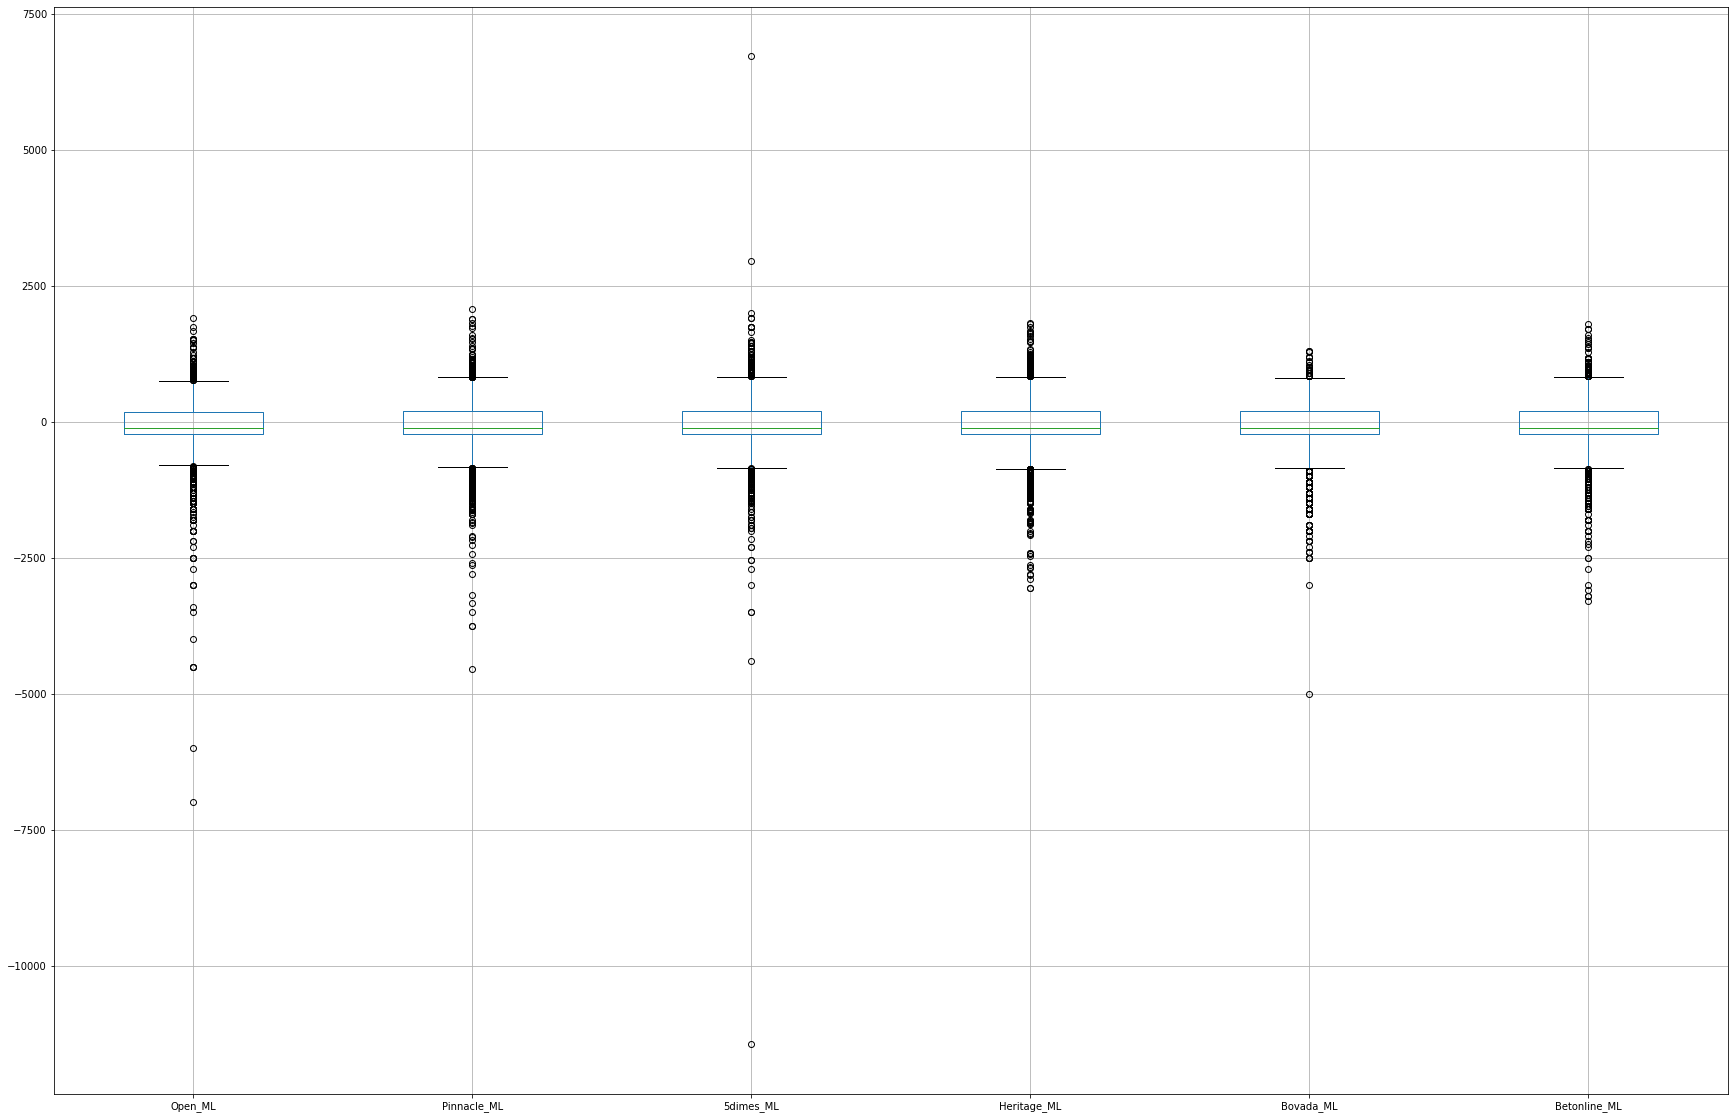

In [188]:
odds_df_all.boxplot(column=["Open_ML", "Pinnacle_ML", "5dimes_ML", "Heritage_ML", "Bovada_ML", "Betonline_ML"], figsize=(30, 20))

<AxesSubplot:>

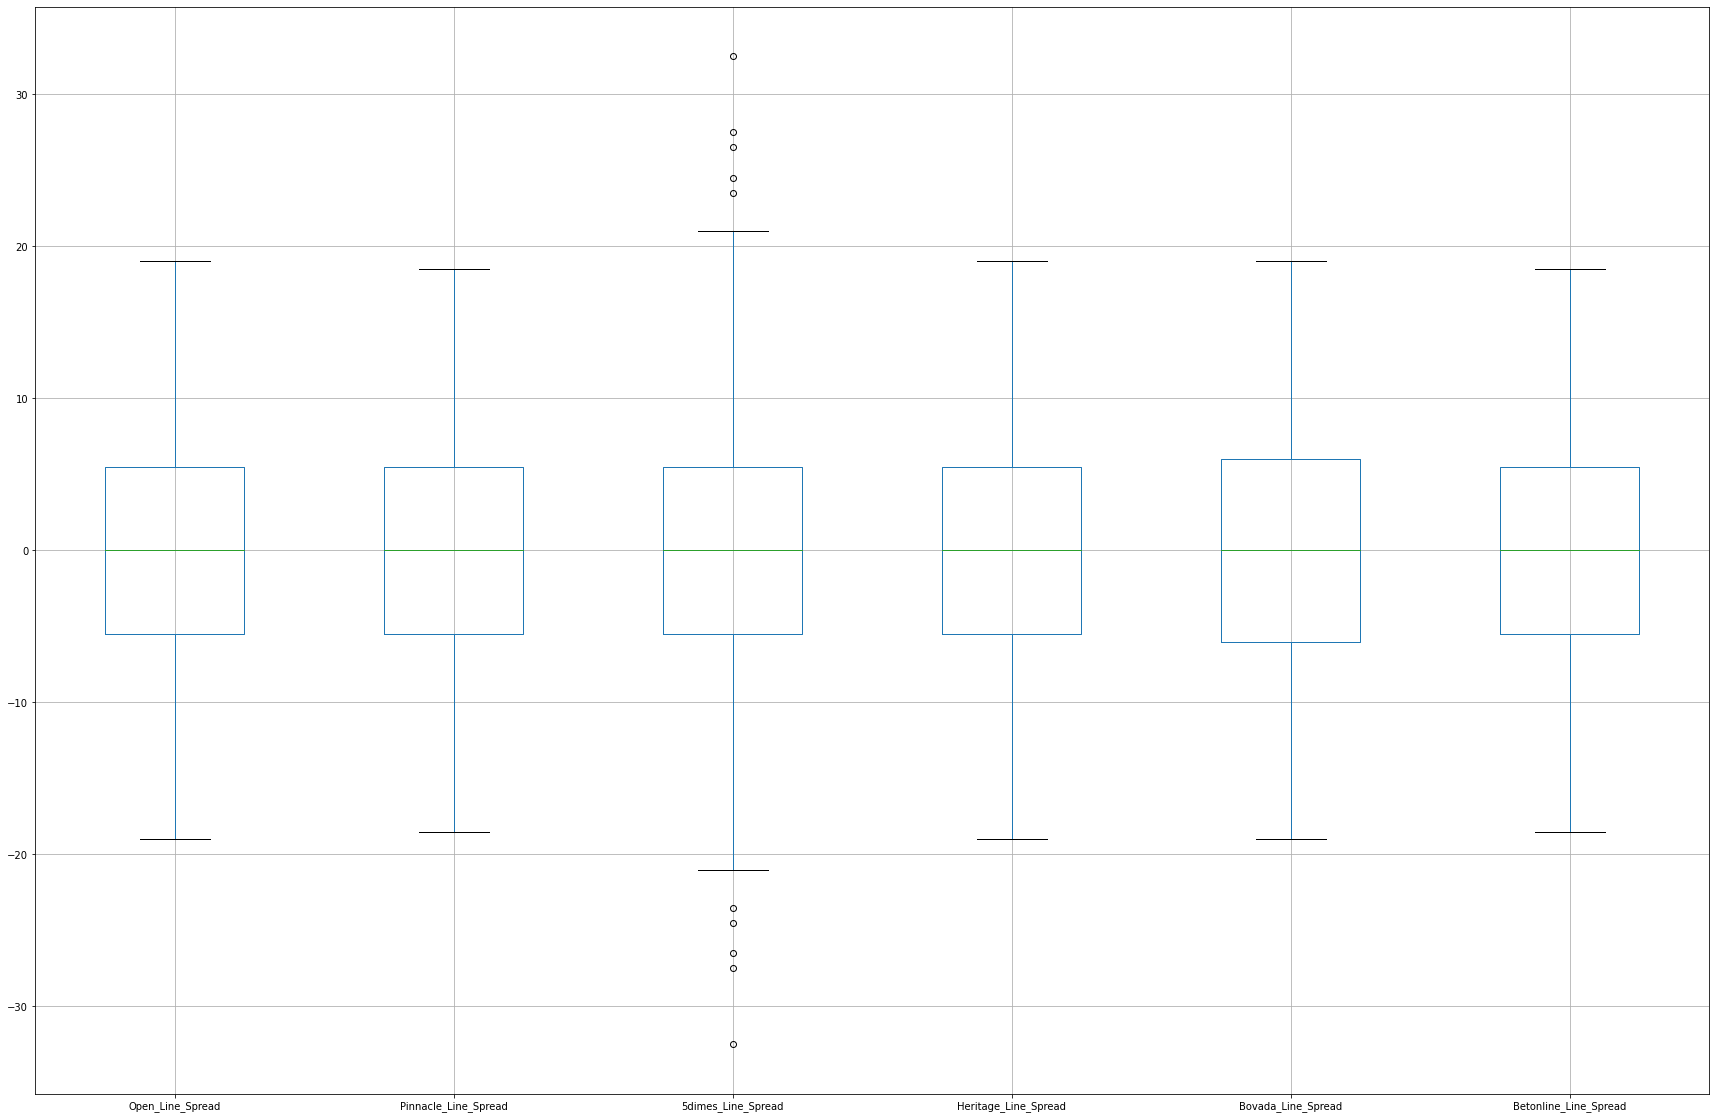

In [189]:
odds_df_all.boxplot(column=["Open_Line_Spread", "Pinnacle_Line_Spread", "5dimes_Line_Spread", "Heritage_Line_Spread", "Bovada_Line_Spread", "Betonline_Line_Spread"], figsize=(30, 20))

<AxesSubplot:>

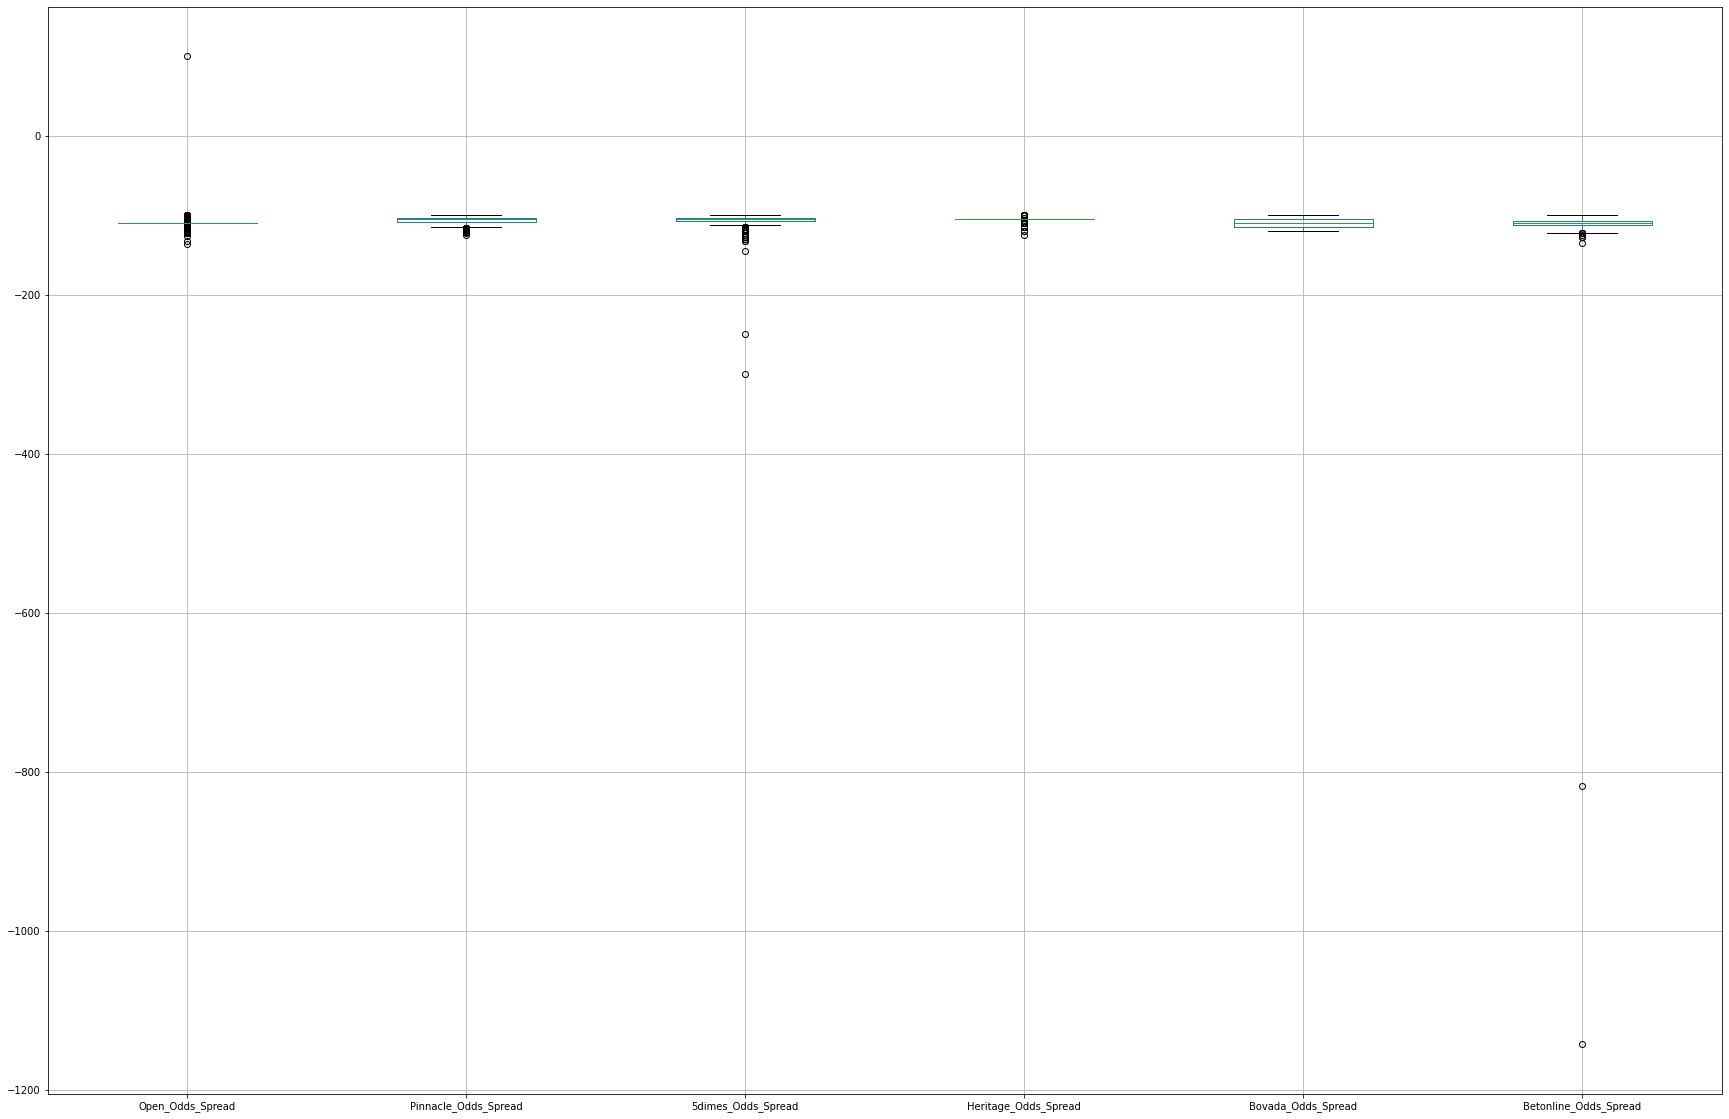

In [190]:
odds_df_all.boxplot(column=["Open_Odds_Spread", "Pinnacle_Odds_Spread", "5dimes_Odds_Spread", "Heritage_Odds_Spread", "Bovada_Odds_Spread", "Betonline_Odds_Spread"], figsize=(30, 20))

<AxesSubplot:>

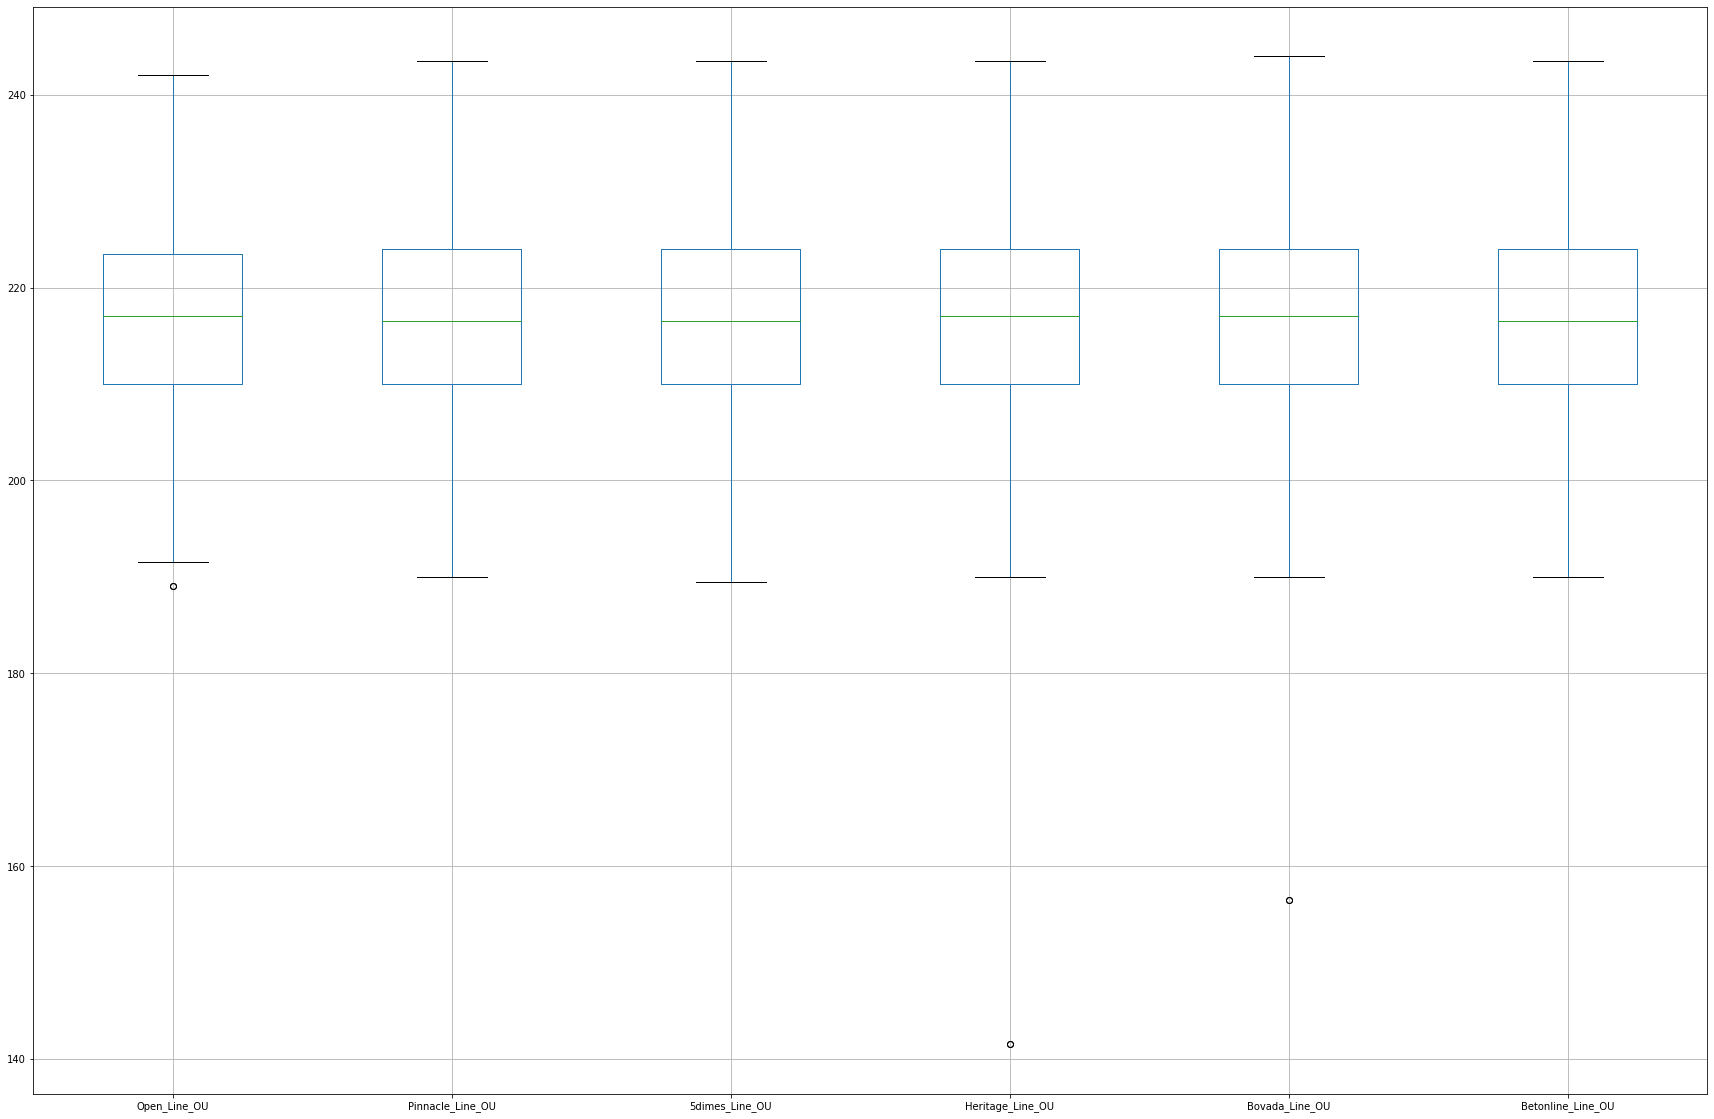

In [198]:
odds_df_all.boxplot(column=["Open_Line_OU", "Pinnacle_Line_OU", "5dimes_Line_OU", "Heritage_Line_OU", "Bovada_Line_OU", "Betonline_Line_OU"], figsize=(30, 20))

<AxesSubplot:>

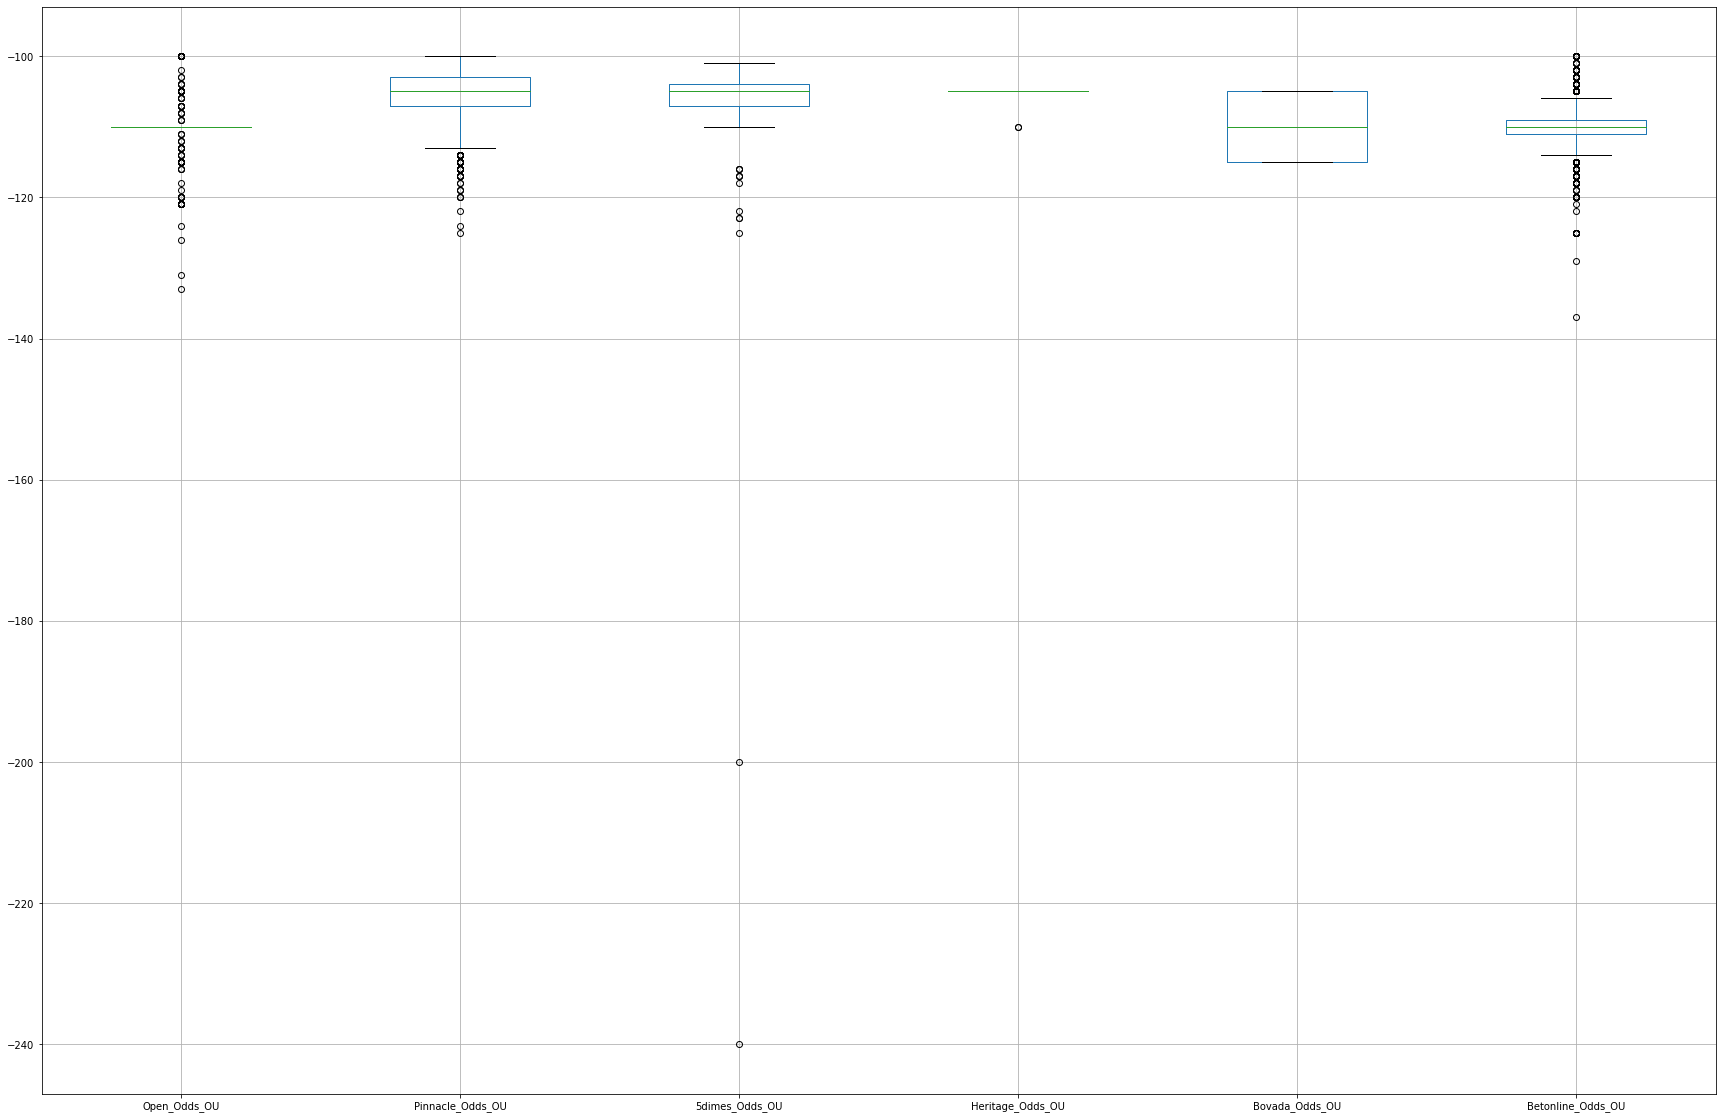

In [199]:
odds_df_all.boxplot(column=["Open_Odds_OU", "Pinnacle_Odds_OU", "5dimes_Odds_OU", "Heritage_Odds_OU", "Bovada_Odds_OU", "Betonline_Odds_OU"], figsize=(30, 20))

<h3 style="color: red">Outlier Analysis</h3>
<ul>
    <li>5 Dimes has the most outliers of any of the sportsbooks (especially in Spreads and Moneylines)</li>
    <li>It is also a sportsbook that has had a variety of issues amongst U.S. bettors and is no longer available to access in the United States.</li>
    <li>Using these numbers/figures which so vary from the comparable books won't give me a proper evaluation of any model I create.</li>
    <br>
    <li>From the remaining books, there are 2 with Betonline's Spread Odds and 1 for both Heritage's and Bovada's Over/Under</li>
    <li><b>Data Cleaning Plan: Remove 5dimes Data, Investigate remaining Outliers and Recalculate Summary Columns (Average, Best, Worst)</b></li>
</ul>

In [200]:
odds_df_all = odds_df_all.drop(labels=[x for x in full_odds_df.columns if x.startswith("5dimes")], axis=1)

##### Outlier Investigation:
###### 1. Look at Heritage_Line_OU and Bovada_Line_OU Minimum outliers (two cases)
###### 2. Look at Betonline's Spread Odds (two cases)
###### 3. Look at Moneyline Above -4000 (a handful of cases)

In [201]:
odds_df_all[(odds_df_all.Heritage_Line_OU < 160) | (odds_df_all.Bovada_Line_OU < 160)][[x for x in odds_df_all.columns if "_OU" in x]]

,PercentBet_OU,Open_Line_OU,Open_Odds_OU,Pinnacle_Line_OU,Pinnacle_Odds_OU,Heritage_Line_OU,Heritage_Odds_OU,Bovada_Line_OU,Bovada_Odds_OU,Betonline_Line_OU,Betonline_Odds_OU,Average_Line_OU,Average_Odds_OU,Best_Line_OU,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU
30,53.4,217.0,-110.0,218.5,-113.0,219.5,-105.0,156.5,-115.0,219.0,-110.0,208.25,-109.67,219.5,156.5,-105.0,-115.0
31,46.6,217.0,-110.0,218.5,-102.0,219.5,-105.0,156.5,-115.0,219.0,-110.0,208.25,-107.83,219.5,156.5,-102.0,-115.0
1262,55.0,207.0,-110.0,209.0,-105.0,141.5,-110.0,209.0,-115.0,209.5,-110.0,197.50,-109.67,209.5,141.5,-105.0,-115.0
1263,45.0,207.0,-110.0,209.0,-105.0,141.5,-110.0,209.0,-105.0,209.5,-110.0,197.50,-107.00,209.5,141.5,-102.0,-110.0


In [218]:
odds_df_all[(odds_df_all.Heritage_Line_OU < 160) | (odds_df_all.Bovada_Line_OU < 160)].iloc[:, 16:30]#[[x for x in odds_df_all.columns if "Bovada_" in x]]

,Open_Line_Spread,Open_Odds_Spread,Pinnacle_Line_Spread,Pinnacle_Odds_Spread,Heritage_Line_Spread,Heritage_Odds_Spread,Bovada_Line_Spread,Bovada_Odds_Spread,Betonline_Line_Spread,Betonline_Odds_Spread,Average_Line_Spread,Average_Odds_Spread,Best_Line_Spread,Worst_Line_Spread
30,-3.5,-110.0,-6.5,-102.0,-6.5,-105.0,-16.5,-115.0,-6.5,-107.0,-7.67,-106.67,-3.5,-16.5
31,3.5,-110.0,6.5,-113.0,6.5,-105.0,6.0,-110.0,6.5,-113.0,5.92,-110.00,6.5,3.5
1262,1.0,-110.0,-1.0,-111.0,-1.5,-105.0,-1.0,-105.0,-1.5,-113.0,-0.83,-107.67,1.0,-1.5
1263,-1.0,-110.0,1.0,-101.0,1.5,-105.0,1.0,-115.0,1.5,-107.0,0.83,-107.67,1.5,-1.0


In [226]:
# Wayoff market and peers, replace number and odds with average; Bovada's Line_spread off as well make it 31's negative Bovada_Line_Spread
odds_df_all.loc[30, "Bovada_Line_OU"]  = odds_df_all.loc[30, ["Heritage_Line_OU", "Betonline_Line_OU", "Pinnacle_Line_OU"]].mean()
odds_df_all.loc[31, "Bovada_Line_OU"]  = odds_df_all.loc[31, ["Heritage_Line_OU", "Betonline_Line_OU", "Pinnacle_Line_OU"]].mean()
odds_df_all.loc[1262, "Heritage_Line_OU"] = odds_df_all.loc[1262, ["Bovada_Line_OU", "Betonline_Line_OU", "Pinnacle_Line_OU"]].mean()
odds_df_all.loc[1263, "Heritage_Line_OU"] = odds_df_all.loc[1263, ["Bovada_Line_OU", "Betonline_Line_OU", "Pinnacle_Line_OU"]].mean()

odds_df_all.loc[30, "Bovada_Line_Spread"] = odds_df_all.loc[31, "Bovada_Line_Spread"] * -1  

In [227]:
odds_df_all.loc[30:31, ["Bovada_Line_OU", "Heritage_Line_OU", "Bovada_Line_Spread"]]

,Bovada_Line_OU,Heritage_Line_OU,Bovada_Line_Spread
30,219.0,219.5,-6.0
31,219.0,219.5,6.0


In [228]:
odds_df_all.loc[1262:1263, ["Bovada_Line_OU", "Heritage_Line_OU", "Bovada_Line_Spread"]]

,Bovada_Line_OU,Heritage_Line_OU,Bovada_Line_Spread
1262,209.0,209.166667,-1.0
1263,209.0,209.166667,1.0


In [229]:
odds_df_all.dropna().Betonline_Odds_Spread.sort_values()

3003   -1143.0
3002    -818.0
4848    -135.0
218     -128.0
216     -128.0
         ...  
1853    -100.0
3798    -100.0
5078    -100.0
2612    -100.0
1463    -100.0
Name: Betonline_Odds_Spread, Length: 4260, dtype: float64

In [230]:
odds_df_all.loc[3002:3003, [x for x in odds_df_all.columns if "_Spread" in x]]

,PercentBet_Spread,Open_Line_Spread,Open_Odds_Spread,Pinnacle_Line_Spread,Pinnacle_Odds_Spread,Heritage_Line_Spread,Heritage_Odds_Spread,Bovada_Line_Spread,Bovada_Odds_Spread,Betonline_Line_Spread,Betonline_Odds_Spread,Average_Line_Spread,Average_Odds_Spread,Best_Line_Spread,Worst_Line_Spread,Best_Odds_Spread,Worst_Odds_Spread
3002,46.8,8.5,-110.0,7.5,-102.0,7.5,-105.0,7.5,-115.0,7.5,-818.0,7.67,-225.83,8.5,7.5,-102.0,-818.0
3003,53.2,-8.5,-110.0,-7.5,-113.0,-7.5,-105.0,-7.5,-105.0,-7.5,-1143.0,-7.67,-280.17,-7.5,-8.5,-105.0,-1143.0


In [231]:
odds_df_all.loc[3002:3003, [x for x in odds_df_all.columns if "Betonline_" in x]]

,Betonline_ML,Betonline_Line_Spread,Betonline_Odds_Spread,Betonline_Line_OU,Betonline_Odds_OU
3002,265.0,7.5,-818.0,221.5,-110.0
3003,-315.0,-7.5,-1143.0,221.5,-110.0


In [232]:
odds_df_all.loc[3002:3003, [x for x in odds_df_all.columns if "_OU" in x]]

,PercentBet_OU,Open_Line_OU,Open_Odds_OU,Pinnacle_Line_OU,Pinnacle_Odds_OU,Heritage_Line_OU,Heritage_Odds_OU,Bovada_Line_OU,Bovada_Odds_OU,Betonline_Line_OU,Betonline_Odds_OU,Average_Line_OU,Average_Odds_OU,Best_Line_OU,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU
3002,92.0,220.5,-110.0,221.5,-105.0,221.5,-105.0,222.0,-110.0,221.5,-110.0,221.33,-108.0,222.0,220.5,-105.0,-110.0
3003,8.0,220.5,-110.0,221.5,-105.0,221.5,-105.0,222.0,-110.0,221.5,-110.0,221.33,-107.0,222.0,220.5,-102.0,-110.0


In [233]:
# The Spread Number is Ok the Odds are Not replace with average
odds_df_all.loc[3002, "Betonline_Odds_Spread"] = odds_df_all.loc[3002, ["Heritage_Odds_Spread", "Bovada_Odds_Spread", "Pinnacle_Odds_Spread"]].mean()
odds_df_all.loc[3003, "Betonline_Odds_Spread"] = odds_df_all.loc[3003, ["Heritage_Odds_Spread", "Bovada_Odds_Spread", "Pinnacle_Odds_Spread"]].mean()

In [234]:
odds_df_all.loc[3002:3003, "Betonline_Odds_Spread"]

3002   -107.333333
3003   -107.666667
Name: Betonline_Odds_Spread, dtype: float64

In [236]:
odds_df_all[(odds_df_all.Bovada_ML < -4000) | (odds_df_all.Pinnacle_ML < -4000)][[x for x in odds_df_all.columns if ("_ML" in x) | ("Team" in x)]]

,Team,OppTeam,TeamId,PercentBet_ML,Open_ML,Pinnacle_ML,Heritage_ML,Bovada_ML,Betonline_ML,Average_ML,Best_ML,Worst_ML
4983,Houston,New York,1.610613e+09,36.7,-4500.0,-3762.0,-3050.0,-5000.0,NaN,-3590.5,-2550.0,-5000.0
5015,Houston,Phoenix,1.610613e+09,40.1,-7000.0,-4552.0,-2825.0,NaN,NaN,-3688.5,-2825.0,-4552.0


In [243]:
# Huge Spreads For Houston, one of the best teams in the league that season, Against Teams Tanking at the End of the Season. Keep Them In.
odds_df_all.iloc[4983:5016:32, :20]

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_ML,Pinnacle_ML,Heritage_ML,Bovada_ML,Betonline_ML,Average_ML,Best_ML,Worst_ML,PercentBet_Spread,Open_Line_Spread,Open_Odds_Spread,Pinnacle_Line_Spread,Pinnacle_Odds_Spread
4983,2019-04-05,home,Houston,New York,1.610613e+09,21801184.0,36.7,-4500.0,-3762.0,-3050.0,-5000.0,NaN,-3590.5,-2550.0,-5000.0,56.9,-17.5,-110.0,-18.0,-110.0
5015,2019-04-07,home,Houston,Phoenix,1.610613e+09,21801200.0,40.1,-7000.0,-4552.0,-2825.0,NaN,NaN,-3688.5,-2825.0,-4552.0,51.7,-18.5,-110.0,-18.5,-115.0


<AxesSubplot:>

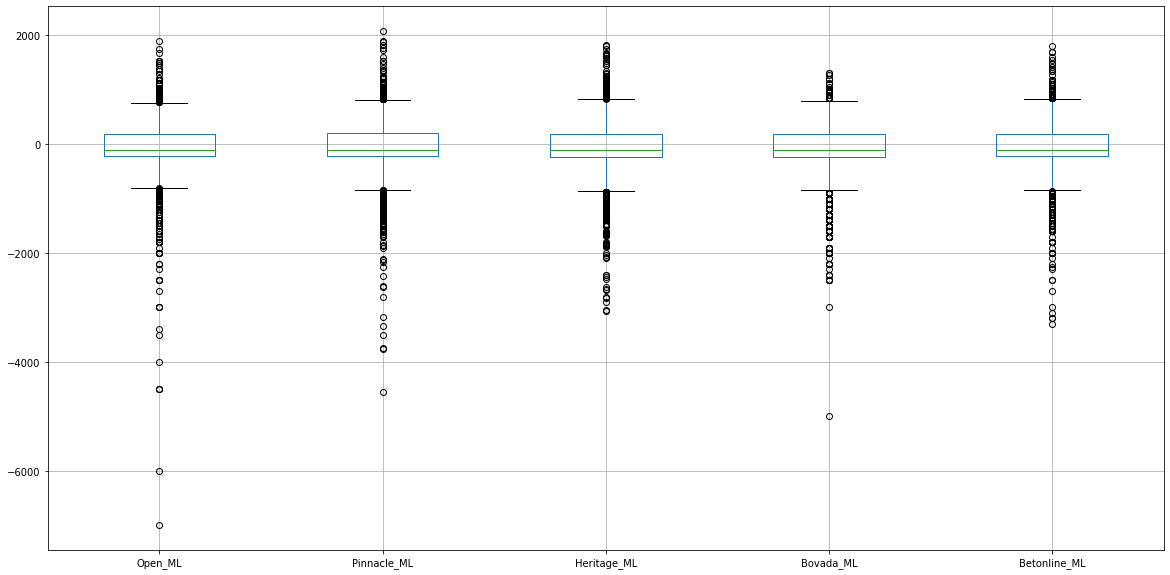

In [238]:
odds_df_all.boxplot(column=["Open_ML", "Pinnacle_ML","Heritage_ML", "Bovada_ML", "Betonline_ML"], figsize=(20, 10))

<AxesSubplot:>

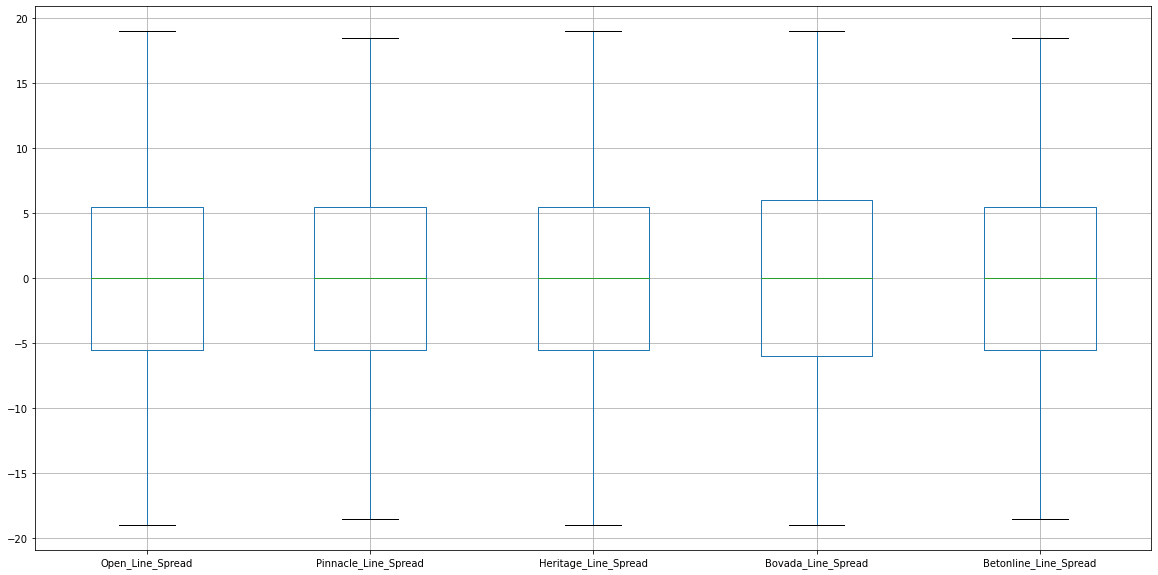

In [239]:
odds_df_all.boxplot(column=["Open_Line_Spread", "Pinnacle_Line_Spread", "Heritage_Line_Spread", "Bovada_Line_Spread", "Betonline_Line_Spread"], figsize=(20, 10))

<AxesSubplot:>

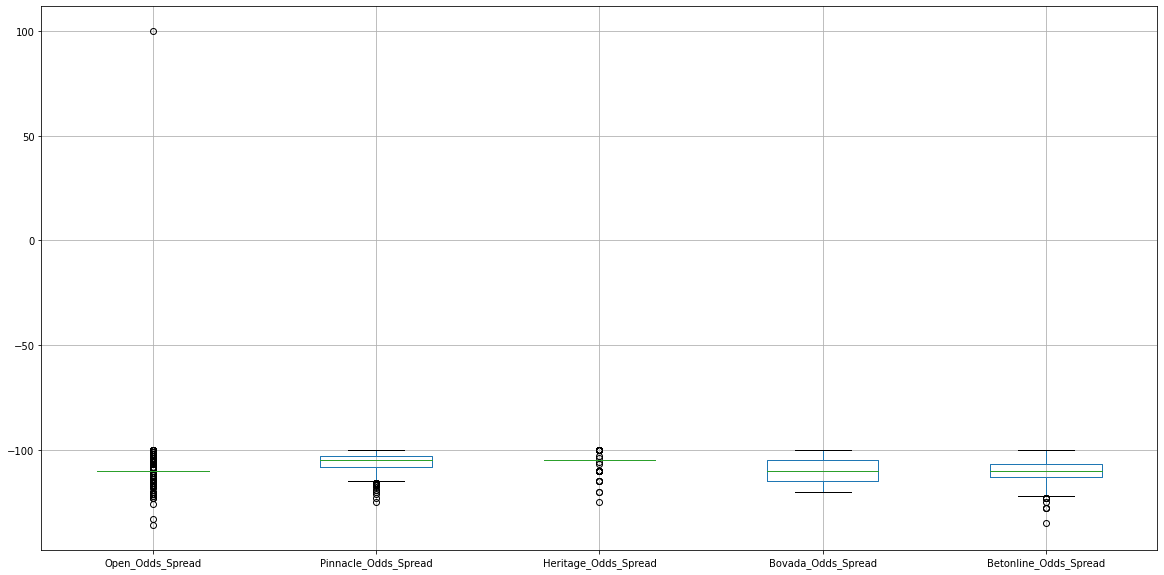

In [240]:
# Outlier Indicates an Even Odds Line. Would Indicate the Market Number Associated with these Odds Is About to Move.
odds_df_all.boxplot(column=["Open_Odds_Spread", "Pinnacle_Odds_Spread", "Heritage_Odds_Spread", "Bovada_Odds_Spread", "Betonline_Odds_Spread"], figsize=(20, 10))

<AxesSubplot:>

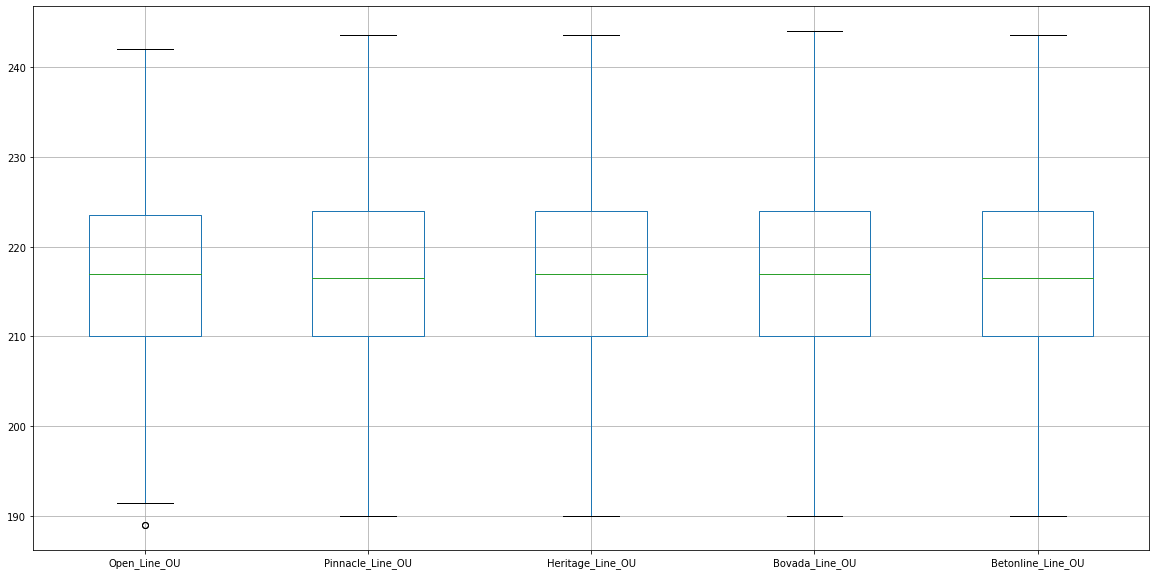

In [241]:
odds_df_all.boxplot(column=["Open_Line_OU", "Pinnacle_Line_OU", "Heritage_Line_OU", "Bovada_Line_OU", "Betonline_Line_OU"], figsize=(20, 10))

<AxesSubplot:>

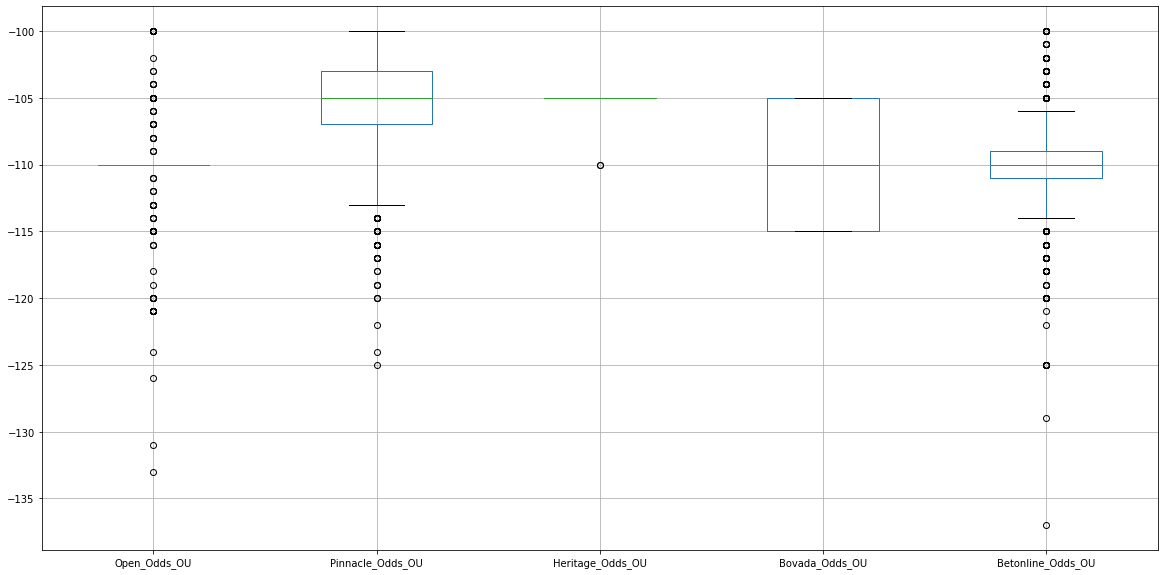

In [242]:
odds_df_all.boxplot(column=["Open_Odds_OU", "Pinnacle_Odds_OU", "Heritage_Odds_OU", "Bovada_Odds_OU", "Betonline_Odds_OU"], figsize=(20, 10))

#### Outliers Examined and Dealt With
#### Next: Understand How Nulls Appears by Book (ex. Is there no book data for multiple games? How much overlap do we have in missing book information?)
##### On Deck: Recalculate Average, Best and Worst Programmatically for each Metric

<h3 style="color: red">Understanding Nulls</h3>
<ul>
    <li>The Sportsbook Columns for the variety of lines they provide (moneylines, spreads, over/unders) are the columns with the most nulls</li>
    <li>Additionally, the time based metric of the summary ones (Open_Line_Spread, Open_Line_ML, etc.), which corresponds to what the bookmakers started the market at, is missing data.</li>
    <li>Summary Data about min/max (Best/Worst Line and Odds), Averages, Percentage Bet, nominal Game Data, and results Data are all intact.</li>
</ul>

In [244]:
odds_df_all.iloc[:, 7:13].count()

Open_ML         5106
Pinnacle_ML     5140
Heritage_ML     5128
Bovada_ML       5126
Betonline_ML    5146
Average_ML      5240
dtype: int64

In [245]:
odds_df_all[(odds_df_all.iloc[:, 7].isnull())].iloc[:, 7:13].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 1922 to 5201
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open_ML       0 non-null      float64
 1   Pinnacle_ML   134 non-null    float64
 2   Heritage_ML   136 non-null    float64
 3   Bovada_ML     140 non-null    float64
 4   Betonline_ML  126 non-null    float64
 5   Average_ML    142 non-null    float64
dtypes: float64(6)
memory usage: 7.8 KB


In [246]:
odds_df_all[(odds_df_all.iloc[:, 8].isnull())].iloc[:, 7:13].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 2726 to 5247
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open_ML       100 non-null    float64
 1   Pinnacle_ML   0 non-null      float64
 2   Heritage_ML   84 non-null     float64
 3   Bovada_ML     96 non-null     float64
 4   Betonline_ML  90 non-null     float64
 5   Average_ML    100 non-null    float64
dtypes: float64(6)
memory usage: 5.9 KB


In [247]:
odds_df_all[(odds_df_all.iloc[:, 9].isnull())].iloc[:, 7:13].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 550 to 5247
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open_ML       114 non-null    float64
 1   Pinnacle_ML   96 non-null     float64
 2   Heritage_ML   0 non-null      float64
 3   Bovada_ML     96 non-null     float64
 4   Betonline_ML  110 non-null    float64
 5   Average_ML    112 non-null    float64
dtypes: float64(6)
memory usage: 6.6 KB


In [253]:
odds_df_all[(odds_df_all.iloc[:, 35].isnull())].iloc[:, 35:45].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 2730 to 5247
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pinnacle_Line_OU   0 non-null      float64
 1   Pinnacle_Odds_OU   0 non-null      float64
 2   Heritage_Line_OU   76 non-null     float64
 3   Heritage_Odds_OU   76 non-null     float64
 4   Bovada_Line_OU     72 non-null     float64
 5   Bovada_Odds_OU     72 non-null     float64
 6   Betonline_Line_OU  82 non-null     float64
 7   Betonline_Odds_OU  82 non-null     float64
 8   Average_Line_OU    86 non-null     float64
 9   Average_Odds_OU    86 non-null     float64
dtypes: float64(10)
memory usage: 8.1 KB


In [254]:
odds_df_all[(odds_df_all.iloc[:, 44].isnull())].iloc[:, 36:48].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 5240 to 5247
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pinnacle_Odds_OU   0 non-null      float64
 1   Heritage_Line_OU   0 non-null      float64
 2   Heritage_Odds_OU   0 non-null      float64
 3   Bovada_Line_OU     0 non-null      float64
 4   Bovada_Odds_OU     0 non-null      float64
 5   Betonline_Line_OU  8 non-null      float64
 6   Betonline_Odds_OU  8 non-null      float64
 7   Average_Line_OU    0 non-null      float64
 8   Average_Odds_OU    0 non-null      float64
 9   Best_Line_OU       0 non-null      float64
 10  Worst_Line_OU      0 non-null      float64
 11  Best_Odds_OU       0 non-null      float64
dtypes: float64(12)
memory usage: 832.0 bytes


In [64]:
full_odds_df[full_odds_df.Bovada_Line_OU.notnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5098 entries, 0 to 5239
Data columns (total 59 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   5098 non-null   object 
 1   Location               5098 non-null   object 
 2   Team                   5098 non-null   object 
 3   OppTeam                5098 non-null   object 
 4   TeamId                 5098 non-null   int64  
 5   GameId                 5098 non-null   int64  
 6   PercentBet_ML          5098 non-null   float64
 7   Open_Line_ML           4960 non-null   float64
 8   Pinnacle_ML            5012 non-null   float64
 9   5dimes_ML              5008 non-null   float64
 10  Heritage_ML            4996 non-null   float64
 11  Bovada_ML              4996 non-null   float64
 12  Betonline_ML           5000 non-null   float64
 13  Average_Line_ML        5098 non-null   float64
 14  Best_Line_ML           5098 non-null   float64
 15  Wors

In [65]:
full_odds_df[(full_odds_df.iloc[:, 11].isnull())].loc[:, ["Bovada_ML", 'Bovada_Line_Spread',
       'Bovada_Odds_Spread', 'Bovada_Line_OU',
       'Bovada_Odds_OU']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 586 to 5239
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Bovada_ML           0 non-null      float64
 1   Bovada_Line_Spread  110 non-null    float64
 2   Bovada_Odds_Spread  110 non-null    float64
 3   Bovada_Line_OU      102 non-null    float64
 4   Bovada_Odds_OU      102 non-null    float64
dtypes: float64(5)
memory usage: 5.3 KB


In [66]:
full_odds_df[(full_odds_df.iloc[:, 44].isnull())].loc[:, ["Bovada_ML", 'Bovada_Line_Spread',
       'Bovada_Odds_Spread', 'Bovada_Line_OU',
       'Bovada_Odds_OU']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 2746 to 5235
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Bovada_ML           130 non-null    float64
 1   Bovada_Line_Spread  134 non-null    float64
 2   Bovada_Odds_Spread  134 non-null    float64
 3   Bovada_Line_OU      0 non-null      float64
 4   Bovada_Odds_OU      0 non-null      float64
dtypes: float64(5)
memory usage: 6.7 KB


In [67]:
full_odds_df[(full_odds_df.iloc[:, 25].isnull())].loc[:, ["Bovada_ML", 'Bovada_Line_Spread',
       'Bovada_Odds_Spread', 'Bovada_Line_OU',
       'Bovada_Odds_OU', 'Pinnacle_Line_Spread', 'Pinnacle_Odds_Spread']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 2726 to 5193
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Bovada_ML             50 non-null     float64
 1   Bovada_Line_Spread    0 non-null      float64
 2   Bovada_Odds_Spread    0 non-null      float64
 3   Bovada_Line_OU        46 non-null     float64
 4   Bovada_Odds_OU        46 non-null     float64
 5   Pinnacle_Line_Spread  48 non-null     float64
 6   Pinnacle_Odds_Spread  48 non-null     float64
dtypes: float64(7)
memory usage: 3.4 KB


In [68]:
full_odds_df = full_odds_df.rename({"Open_Line_ML": "Open_ML"}, axis=1)

In [71]:
null_column_regex = re.compile("_ML|_Spread|_OU")

In [72]:
full_odds_df.dropna().loc[:, [x for x in full_odds_df.columns if null_column_regex.search(x) != None]].describe().iloc[:, :10]

,PercentBet_ML,Open_ML,Pinnacle_ML,5dimes_ML,Heritage_ML,Bovada_ML,Betonline_ML,Average_Line_ML,Best_Line_ML,Worst_Line_ML
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
mean,50.000000,-42.087954,-28.594407,-25.510277,-40.364484,-54.210086,-38.242113,-37.384273,-5.705067,-76.435229
std,12.664497,400.918887,385.322686,454.198747,399.235055,403.166158,390.953267,394.040045,398.005038,460.955270
min,0.000000,-6000.000000,-3750.000000,-11450.000000,-3065.000000,-2500.000000,-3200.000000,-3163.000000,-1900.000000,-11450.000000
25%,43.900000,-215.000000,-217.000000,-215.000000,-230.000000,-230.000000,-222.750000,-223.400000,-210.000000,-240.000000
50%,50.000000,-110.000000,-105.000000,-105.000000,-110.000000,-110.000000,-110.000000,-69.000000,102.000000,-120.000000
75%,56.100000,180.000000,194.000000,195.000000,195.000000,190.000000,192.750000,193.050000,205.000000,185.000000
max,100.000000,1673.000000,1886.000000,6725.000000,1815.000000,1300.000000,1700.000000,1820.200000,6725.000000,1200.000000


In [73]:
full_odds_df.dropna().loc[:, [x for x in full_odds_df.columns if null_column_regex.search(x) != None]].describe().iloc[:, 11:23]

,Open_Line_Spread,Open_Odds_Spread,Pinnacle_Line_Spread,Pinnacle_Odds_Spread,5dimes_Line_Spread,5dimes_Odds_Spread,Heritage_Line_Spread,Heritage_Odds_Spread,Bovada_Line_Spread,Bovada_Odds_Spread,Betonline_Line_Spread,Betonline_Odds_Spread
count,4184.00000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
mean,0.00000,-109.966061,0.000000,-105.485899,0.000000,-105.223709,0.000120,-105.023901,-0.002510,-110.000000,0.000000,-110.445507
std,6.75463,3.749864,6.842915,3.675492,7.020265,3.006512,6.924739,0.646366,7.054435,3.670312,6.864062,19.755435
min,-19.00000,-136.000000,-18.500000,-125.000000,-32.500000,-145.000000,-19.000000,-125.000000,-19.000000,-120.000000,-18.500000,-1143.000000
25%,-5.00000,-110.000000,-5.500000,-108.000000,-5.500000,-107.000000,-5.500000,-105.000000,-5.500000,-115.000000,-5.500000,-113.000000
50%,0.00000,-110.000000,0.000000,-105.000000,0.000000,-105.000000,0.000000,-105.000000,0.000000,-110.000000,0.000000,-110.000000
75%,5.00000,-110.000000,5.500000,-103.000000,5.500000,-103.000000,5.500000,-105.000000,5.500000,-105.000000,5.500000,-107.000000
max,19.00000,100.000000,18.500000,-100.000000,32.500000,-100.000000,19.000000,-100.000000,19.000000,-100.000000,18.500000,-100.000000


In [77]:
full_odds_df.dropna().Betonline_Odds_Spread.sort_values()

3003   -1143.0
3002    -818.0
4848    -135.0
218     -128.0
1996    -128.0
         ...  
4400    -100.0
1463    -100.0
4906    -100.0
3652    -100.0
335     -100.0
Name: Betonline_Odds_Spread, Length: 4184, dtype: float64

In [78]:
# Issue: There are a few betonline Odds that are wildly off typical lines. Odds Given for Spreads are Never beyond the range of +100 to-200
    # Odds higher/lower than that would force the market line to move, since books want equal action on both sides.
# Fix: Examine bad odds and adjust numbers and the corresponding average column and worst_odds_spread that factor in this improper number.
# Spread Odds:
    # Offending books: 2 rows (3002, 3003)

In [79]:
full_odds_df.iloc[3002:3004, 26:40]

,Bovada_Odds_Spread,Betonline_Line_Spread,Betonline_Odds_Spread,Average_Line_Spread,Average_Odds_Spread,Best_Line_Spread,Worst_Line_Spread,Best_Odds_Spread,Worst_Odds_Spread,PercentBet_OU,Open_Line_OU,Open_Odds_OU,Pinnacle_Line_OU,Pinnacle_Odds_OU
3002,-115.0,7.5,-818.0,7.67,-225.83,8.5,7.5,-102.0,-818.0,92.0,220.5,-110.0,221.5,-105.0
3003,-105.0,-7.5,-1143.0,-7.67,-280.17,-7.5,-8.5,-105.0,-1143.0,8.0,220.5,-110.0,221.5,-105.0


In [80]:
full_odds_df.loc[3002, ["Open_Odds_Spread", "Pinnacle_Odds_Spread", "5dimes_Odds_Spread", "Heritage_Odds_Spread", "Bovada_Odds_Spread", "Betonline_Odds_Spread", "Average_Odds_Spread", "Worst_Odds_Spread"]]

Open_Odds_Spread           -110
Pinnacle_Odds_Spread       -102
5dimes_Odds_Spread         -105
Heritage_Odds_Spread       -105
Bovada_Odds_Spread         -115
Betonline_Odds_Spread      -818
Average_Odds_Spread     -225.83
Worst_Odds_Spread          -818
Name: 3002, dtype: object

In [83]:
# Recalculate Average_Odds_Spread based on all Books sans Betonline (mean)
full_odds_df.loc[3002, ["Average_Odds_Spread"]] = full_odds_df.loc[3002, ["Pinnacle_Odds_Spread", "Heritage_Odds_Spread", "Bovada_Odds_Spread"]].mean()
# Recalculate Worst_Odds_Spread based on all the Books with correct line (min)
full_odds_df.loc[3002, ["Worst_Odds_Spread"]] = full_odds_df.loc[3002, ["Pinnacle_Odds_Spread", "Heritage_Odds_Spread", "Bovada_Odds_Spread"]].min()
# Replace Betonline_Odds_Spread with Average_Odds_Spread
full_odds_df.loc[3002, ["Betonline_Odds_Spread"]] = round(full_odds_df.loc[3002, ["Average_Odds_Spread"]][0])

In [84]:
full_odds_df.loc[3002, ["Open_Odds_Spread", "Pinnacle_Odds_Spread", "5dimes_Odds_Spread", "Heritage_Odds_Spread", "Bovada_Odds_Spread", "Betonline_Odds_Spread", "Average_Odds_Spread", "Worst_Odds_Spread"]]

Open_Odds_Spread          -110
Pinnacle_Odds_Spread      -102
5dimes_Odds_Spread        -105
Heritage_Odds_Spread      -105
Bovada_Odds_Spread        -115
Betonline_Odds_Spread     -107
Average_Odds_Spread     -107.4
Worst_Odds_Spread         -115
Name: 3002, dtype: object

In [85]:
full_odds_df.loc[3003, ["Open_Odds_Spread", "Pinnacle_Odds_Spread", "5dimes_Odds_Spread", "Heritage_Odds_Spread", "Bovada_Odds_Spread", "Betonline_Odds_Spread", "Average_Odds_Spread", "Worst_Odds_Spread"]]

Open_Odds_Spread           -110
Pinnacle_Odds_Spread       -113
5dimes_Odds_Spread         -105
Heritage_Odds_Spread       -105
Bovada_Odds_Spread         -105
Betonline_Odds_Spread     -1143
Average_Odds_Spread     -280.17
Worst_Odds_Spread         -1143
Name: 3003, dtype: object

In [86]:
# Recalculate Average_Odds_Spread based on all Books sans Betonline (mean)
full_odds_df.loc[3003, ["Average_Odds_Spread"]] = full_odds_df.loc[3003, ["Pinnacle_Odds_Spread", "Heritage_Odds_Spread", "Bovada_Odds_Spread"]].mean()
# Recalculate Worst_Odds_Spread based on all the Books with correct line (min)
full_odds_df.loc[3003, ["Worst_Odds_Spread"]] = full_odds_df.loc[3003, ["Pinnacle_Odds_Spread", "Heritage_Odds_Spread", "Bovada_Odds_Spread"]].min()
# Replace Betonline_Odds_Spread with Average_Odds_Spread
full_odds_df.loc[3003, ["Betonline_Odds_Spread"]] = round(full_odds_df.loc[3003, ["Average_Odds_Spread"]][0])

In [87]:
full_odds_df.loc[3003, ["Open_Odds_Spread", "Pinnacle_Odds_Spread", "5dimes_Odds_Spread", "Heritage_Odds_Spread", "Bovada_Odds_Spread", "Betonline_Odds_Spread", "Average_Odds_Spread", "Worst_Odds_Spread"]]

Open_Odds_Spread          -110
Pinnacle_Odds_Spread      -113
5dimes_Odds_Spread        -105
Heritage_Odds_Spread      -105
Bovada_Odds_Spread        -105
Betonline_Odds_Spread     -108
Average_Odds_Spread     -107.6
Worst_Odds_Spread         -113
Name: 3003, dtype: object

In [92]:
full_odds_df.dropna().loc[:, [x for x in full_odds_df.columns if null_column_regex.search(x) != None]].describe().iloc[:, 22:30:2]

,Betonline_Odds_Spread,Average_Odds_Spread,Worst_Line_Spread,Worst_Odds_Spread
count,4184.000000,4184.000000,4184.000000,4184.000000
mean,-110.028203,-107.621315,-0.846678,-112.756931
std,3.942470,1.546054,6.899710,2.950455
min,-135.000000,-114.500000,-32.500000,-145.000000
25%,-113.000000,-108.670000,-6.000000,-115.000000
50%,-110.000000,-107.500000,-1.500000,-113.000000
75%,-107.000000,-106.670000,4.500000,-110.000000
max,-100.000000,-72.670000,15.500000,-105.000000


In [74]:
full_odds_df.dropna().loc[:, [x for x in full_odds_df.columns if null_column_regex.search(x) != None]].describe().iloc[:, 30:50]

,Open_Line_OU,Open_Odds_OU,Pinnacle_Line_OU,Pinnacle_Odds_OU,5dimes_Line_OU,5dimes_Odds_OU,Heritage_Line_OU,Heritage_Odds_OU,Bovada_Line_OU,Bovada_Odds_OU,Betonline_Line_OU,Betonline_Odds_OU,Average_Line_OU,Average_Odds_OU,Best_Line_OU,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
mean,215.956979,-110.012189,215.890057,-105.286090,215.869503,-105.070746,215.938098,-105.002390,216.000239,-110.002390,215.884560,-110.020076,215.923203,-107.565645,217.229446,214.632648,-103.523662,-112.385277
std,9.418489,1.123327,9.754939,3.118757,9.761043,2.058031,9.960626,0.109304,9.828611,3.926773,9.756511,3.117368,9.662331,1.145504,9.547880,9.776573,1.611403,2.660615
min,189.000000,-133.000000,190.000000,-125.000000,189.500000,-125.000000,141.500000,-110.000000,156.500000,-115.000000,190.000000,-129.000000,190.000000,-112.330000,190.500000,141.500000,-105.000000,-133.000000
25%,209.000000,-110.000000,208.500000,-107.000000,208.500000,-107.000000,209.000000,-105.000000,209.000000,-115.000000,208.500000,-111.000000,208.920000,-108.330000,210.000000,208.000000,-105.000000,-115.000000
50%,216.000000,-110.000000,216.000000,-105.000000,216.000000,-105.000000,216.000000,-105.000000,216.000000,-110.000000,216.000000,-110.000000,215.830000,-107.500000,217.000000,214.500000,-104.000000,-111.000000
75%,222.500000,-110.000000,222.500000,-103.000000,223.000000,-103.000000,223.000000,-105.000000,223.000000,-105.000000,222.500000,-109.000000,222.670000,-106.670000,224.000000,221.000000,-102.000000,-110.000000
max,240.500000,-100.000000,242.000000,-100.000000,242.000000,-101.000000,242.500000,-105.000000,243.000000,-105.000000,242.000000,-100.000000,242.000000,-104.000000,243.000000,240.500000,-100.000000,-105.000000


In [75]:
full_odds_df.dropna().loc[:, [x for x in full_odds_df.columns if null_column_regex.search(x) != None]].describe().iloc[:, 1:20]

,Open_ML,Pinnacle_ML,5dimes_ML,Heritage_ML,Bovada_ML,Betonline_ML,Average_Line_ML,Best_Line_ML,Worst_Line_ML,PercentBet_Spread,Open_Line_Spread,Open_Odds_Spread,Pinnacle_Line_Spread,Pinnacle_Odds_Spread,5dimes_Line_Spread,5dimes_Odds_Spread,Heritage_Line_Spread,Heritage_Odds_Spread,Bovada_Line_Spread
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.00000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
mean,-42.087954,-28.594407,-25.510277,-40.364484,-54.210086,-38.242113,-37.384273,-5.705067,-76.435229,50.000000,0.00000,-109.966061,0.000000,-105.485899,0.000000,-105.223709,0.000120,-105.023901,-0.002510
std,400.918887,385.322686,454.198747,399.235055,403.166158,390.953267,394.040045,398.005038,460.955270,11.365205,6.75463,3.749864,6.842915,3.675492,7.020265,3.006512,6.924739,0.646366,7.054435
min,-6000.000000,-3750.000000,-11450.000000,-3065.000000,-2500.000000,-3200.000000,-3163.000000,-1900.000000,-11450.000000,0.000000,-19.00000,-136.000000,-18.500000,-125.000000,-32.500000,-145.000000,-19.000000,-125.000000,-19.000000
25%,-215.000000,-217.000000,-215.000000,-230.000000,-230.000000,-222.750000,-223.400000,-210.000000,-240.000000,44.600000,-5.00000,-110.000000,-5.500000,-108.000000,-5.500000,-107.000000,-5.500000,-105.000000,-5.500000
50%,-110.000000,-105.000000,-105.000000,-110.000000,-110.000000,-110.000000,-69.000000,102.000000,-120.000000,50.000000,0.00000,-110.000000,0.000000,-105.000000,0.000000,-105.000000,0.000000,-105.000000,0.000000
75%,180.000000,194.000000,195.000000,195.000000,190.000000,192.750000,193.050000,205.000000,185.000000,55.400000,5.00000,-110.000000,5.500000,-103.000000,5.500000,-103.000000,5.500000,-105.000000,5.500000
max,1673.000000,1886.000000,6725.000000,1815.000000,1300.000000,1700.000000,1820.200000,6725.000000,1200.000000,100.000000,19.00000,100.000000,18.500000,-100.000000,32.500000,-100.000000,19.000000,-100.000000,19.000000


In [94]:
full_odds_df[lambda x: x["5dimes_ML"] <= -2000].loc[:, ["Team", "OppTeam", "Average_Line_Spread", "Open_Line_Spread","Open_ML", "Pinnacle_ML", "5dimes_ML", "Heritage_ML", "Bovada_ML", "Betonline_ML", "Average_Line_ML", "Best_Line_ML", "Worst_Line_ML"]]

,Team,OppTeam,Average_Line_Spread,Open_Line_Spread,Open_ML,Pinnacle_ML,5dimes_ML,Heritage_ML,Bovada_ML,Betonline_ML,Average_Line_ML,Best_Line_ML,Worst_Line_ML
63,Houston,Dallas,-14.83,-10.5,-890.0,-750.0,-2000.0,-860.0,-900.0,-750.0,-1052.00,-750.0,-2000.0
73,L.A. Clippers,Phoenix,-15.42,-11.0,-1025.0,-1200.0,-3500.0,-1230.0,-1500.0,-1150.0,-1716.00,-1150.0,-3500.0
116,San Antonio,Miami,-4.42,-3.0,-170.0,-157.0,-3000.0,-155.0,-160.0,-155.0,-725.40,-155.0,-3000.0
125,Golden State,Toronto,-11.00,-11.5,-950.0,-940.0,-3500.0,-1010.0,-1100.0,-910.0,-1492.00,-910.0,-3500.0
563,Houston,New York,-17.50,-11.5,-1300.0,-3750.0,-4400.0,-3065.0,-1400.0,-3200.0,-3163.00,-1400.0,-4400.0
587,Houston,Brooklyn,-17.58,-15.5,-3000.0,-3333.0,-2550.0,-2685.0,NaN,-3000.0,-2892.00,-2550.0,-3333.0
2263,Houston,Phoenix,-17.58,-18.0,-3400.0,-3176.0,-2700.0,-2895.0,NaN,-3200.0,-2992.75,-2700.0,-3200.0
2453,Oklahoma City,Memphis,-16.75,-17.5,-3000.0,-3500.0,-2300.0,-2665.0,NaN,-3300.0,-2941.25,-2300.0,-3500.0
2622,Golden State,Cleveland,-4.33,-5.0,-210.0,-166.0,-11450.0,-170.0,-170.0,-167.0,-2424.60,-166.0,-11450.0
3829,Golden State,New York,-17.00,-16.5,-4500.0,-2805.0,-2300.0,-2800.0,NaN,-2700.0,-2651.25,-2300.0,-2805.0


In [95]:
full_odds_df[lambda x: x["5dimes_ML"] >= 2000].loc[:, ["Team", "OppTeam", "Average_Line_Spread", "Open_Line_Spread","Open_ML", "Pinnacle_ML", "5dimes_ML", "Heritage_ML", "Bovada_ML", "Betonline_ML", "Average_Line_ML", "Best_Line_ML", "Worst_Line_ML"]]

,Team,OppTeam,Average_Line_Spread,Open_Line_Spread,Open_ML,Pinnacle_ML,5dimes_ML,Heritage_ML,Bovada_ML,Betonline_ML,Average_Line_ML,Best_Line_ML,Worst_Line_ML
562,New York,Houston,17.50,11.5,875.0,1886.0,2950.0,1815.0,750.0,1700.0,1820.2,2950.0,750.0
2262,Phoenix,Houston,17.58,18.0,1900.0,1721.0,2000.0,1745.0,NaN,1700.0,1791.5,2000.0,1700.0
2623,Cleveland,Golden State,4.33,5.0,180.0,150.0,6725.0,150.0,150.0,147.0,1464.4,6725.0,147.0


In [98]:
# 5dimes_ML drags average down 
# Investigate rows with large discrepancies in Best_Worst_Lines
full_odds_df.assign(Best_Minus_Worst = lambda x: abs(x.Best_Line_ML - x.Worst_Line_ML)).Best_Minus_Worst.describe()

count     5240.000000
mean        70.374809
std        237.484958
min          0.000000
25%         11.000000
50%         20.000000
75%         60.000000
max      11284.000000
Name: Best_Minus_Worst, dtype: float64

In [110]:
full_odds_df.assign(Best_Minus_Worst = lambda x: abs(x.Best_Line_ML - x.Worst_Line_ML)).sort_values("Best_Minus_Worst", ascending=False).iloc[:20, :10]

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_ML,Pinnacle_ML,5dimes_ML
2622,6/8/2018,away,Golden State,Cleveland,1610612744,41700404,41.5,-210.0,-166.0,-11450.0
2623,6/8/2018,home,Cleveland,Golden State,1610612739,41700404,58.5,180.0,150.0,6725.0
563,2017-11-25,home,Houston,New York,1610612745,21700282,34.7,-1300.0,-3750.0,-4400.0
116,2017-10-25,away,San Antonio,Miami,1610612759,21700059,46.8,-170.0,-157.0,-3000.0
125,2017-10-25,home,Golden State,Toronto,1610612744,21700063,36.1,-950.0,-940.0,-3500.0
4983,2019-04-05,home,Houston,New York,1610612745,21801184,36.7,-4500.0,-3762.0,-2550.0
73,2017-10-21,home,L.A. Clippers,Phoenix,1610612746,21700037,46.7,-1025.0,-1200.0,-3500.0
562,2017-11-25,away,New York,Houston,1610612752,21700282,65.3,875.0,1886.0,2950.0
2479,4/16/2018,home,Golden State,San Antonio,1610612744,41700152,52.0,-600.0,-561.0,-545.0
2620,6/6/2018,away,Golden State,Cleveland,1610612744,41700403,32.0,-195.0,-147.0,-1950.0


In [132]:
full_odds_df.loc[:, ["Open_ML", "Pinnacle_ML", "5dimes_ML", "Heritage_ML", "Bovada_ML", "Betonline_ML", "Average_Line_ML","Best_Line_ML", "Worst_Line_ML"]]

,Open_ML,Pinnacle_ML,5dimes_ML,Heritage_ML,Bovada_ML,Betonline_ML,Average_Line_ML,Best_Line_ML,Worst_Line_ML
0,150.0,166.0,170.0,165.0,170.0,175.0,169.20,175.0,165.0
1,-170.0,-185.0,-185.0,-190.0,-200.0,-205.0,-193.00,-185.0,-205.0
2,405.0,377.0,420.0,390.0,340.0,375.0,380.40,420.0,340.0
3,-500.0,-440.0,-475.0,-515.0,-480.0,-450.0,-472.00,-440.0,-515.0
4,130.0,127.0,130.0,125.0,125.0,123.0,126.00,130.0,123.0
...,...,...,...,...,...,...,...,...,...
5235,-253.0,-216.0,NaN,-230.0,-225.0,-215.0,-221.50,-215.0,-230.0
5236,135.0,-104.0,-105.0,-110.0,215.0,-107.0,-42.20,215.0,-110.0
5237,-155.0,-106.0,-105.0,-110.0,-260.0,-113.0,-138.80,-105.0,-260.0
5238,151.0,125.0,125.0,125.0,NaN,118.0,123.25,125.0,118.0


In [127]:
full_odds_df.loc[5235, ["Open_ML", "Pinnacle_ML", "5dimes_ML", "Heritage_ML", "Bovada_ML", "Betonline_ML", "Average_Line_ML", "Best_Line_ML", "Worst_Line_ML"]]

Open_ML             -253
Pinnacle_ML         -216
5dimes_ML            NaN
Heritage_ML         -230
Bovada_ML           -225
Betonline_ML        -215
Average_Line_ML   -221.5
Best_Line_ML        -215
Worst_Line_ML       -230
Name: 5235, dtype: object

In [131]:
full_odds_df.loc[5235, ["Pinnacle_ML", "5dimes_ML", "Heritage_ML", "Bovada_ML", "Betonline_ML"]].mean()

-221.5

In [133]:
full_odds_df.loc[5235, ["Pinnacle_ML", "5dimes_ML", "Heritage_ML", "Bovada_ML", "Betonline_ML"]].min()

-230.0

In [134]:
full_odds_df.loc[5235, ["Pinnacle_ML", "5dimes_ML", "Heritage_ML", "Bovada_ML", "Betonline_ML"]].max()

-215.0

In [141]:
full_odds_df = full_odds_df.drop(labels=[x for x in full_odds_df.columns if x.startswith("5dimes")], axis=1)

In [142]:
full_odds_df.columns

Index(['Date', 'Location', 'Team', 'OppTeam', 'TeamId', 'GameId',
       'PercentBet_ML', 'Open_ML', 'Pinnacle_ML', 'Heritage_ML', 'Bovada_ML',
       'Betonline_ML', 'Average_Line_ML', 'Best_Line_ML', 'Worst_Line_ML',
       'PercentBet_Spread', 'Open_Line_Spread', 'Open_Odds_Spread',
       'Pinnacle_Line_Spread', 'Pinnacle_Odds_Spread', 'Heritage_Line_Spread',
       'Heritage_Odds_Spread', 'Bovada_Line_Spread', 'Bovada_Odds_Spread',
       'Betonline_Line_Spread', 'Betonline_Odds_Spread', 'Average_Line_Spread',
       'Average_Odds_Spread', 'Best_Line_Spread', 'Worst_Line_Spread',
       'Best_Odds_Spread', 'Worst_Odds_Spread', 'PercentBet_OU',
       'Open_Line_OU', 'Open_Odds_OU', 'Pinnacle_Line_OU', 'Pinnacle_Odds_OU',
       'Heritage_Line_OU', 'Heritage_Odds_OU', 'Bovada_Line_OU',
       'Bovada_Odds_OU', 'Betonline_Line_OU', 'Betonline_Odds_OU',
       'Average_Line_OU', 'Average_Odds_OU', 'Best_Line_OU', 'Worst_Line_OU',
       'Best_Odds_OU', 'Worst_Odds_OU', 'Pts', 'Spread

In [154]:
summary_cols = ["Average_ML", "Best_ML", "Worst_ML",
                "Average_Line_Spread", "Best_Line_Spread", "Worst_Line_Spread", "Average_Odds_Spread", "Best_Odds_Spread", "Worst_Odds_Spread",
               'Average_Line_OU', 'Average_Odds_OU', 'Best_Line_OU', 'Worst_Line_OU','Best_Odds_OU', 'Worst_Odds_OU']

books_col = ["Pinnacle", "Heritage", "Bovada", "Betonline"]

In [158]:
book_regex = re.compile(r"Pinnacle|Heritage|Bovada|Betonline")

['Pinnacle_ML', 'Heritage_ML', 'Bovada_ML', 'Betonline_ML']
['Pinnacle_ML', 'Heritage_ML', 'Bovada_ML', 'Betonline_ML']
['Pinnacle_ML', 'Heritage_ML', 'Bovada_ML', 'Betonline_ML']
['Pinnacle_Line_Spread', 'Heritage_Line_Spread', 'Bovada_Line_Spread', 'Betonline_Line_Spread']
['Pinnacle_Line_Spread', 'Heritage_Line_Spread', 'Bovada_Line_Spread', 'Betonline_Line_Spread']
['Pinnacle_Line_Spread', 'Heritage_Line_Spread', 'Bovada_Line_Spread', 'Betonline_Line_Spread']
['Pinnacle_Odds_Spread', 'Heritage_Odds_Spread', 'Bovada_Odds_Spread', 'Betonline_Odds_Spread']
['Pinnacle_Odds_Spread', 'Heritage_Odds_Spread', 'Bovada_Odds_Spread', 'Betonline_Odds_Spread']
['Pinnacle_Odds_Spread', 'Heritage_Odds_Spread', 'Bovada_Odds_Spread', 'Betonline_Odds_Spread']
['Pinnacle_Line_OU', 'Heritage_Line_OU', 'Bovada_Line_OU', 'Betonline_Line_OU']
['Pinnacle_Odds_OU', 'Heritage_Odds_OU', 'Bovada_Odds_OU', 'Betonline_Odds_OU']
['Pinnacle_Line_OU', 'Heritage_Line_OU', 'Bovada_Line_OU', 'Betonline_Line_OU']
['Pi

In [182]:
full_odds_df[['Pinnacle_ML', 'Heritage_ML', 'Bovada_ML', 'Betonline_ML', "Average_ML", "Best_ML", "Worst_ML"]]#.max(axis=1)

,Pinnacle_ML,Heritage_ML,Bovada_ML,Betonline_ML,Average_ML,Best_ML,Worst_ML
0,166.0,165.0,170.0,175.0,169.20,175.0,165.0
1,-185.0,-190.0,-200.0,-205.0,-193.00,-185.0,-205.0
2,377.0,390.0,340.0,375.0,380.40,420.0,340.0
3,-440.0,-515.0,-480.0,-450.0,-472.00,-440.0,-515.0
4,127.0,125.0,125.0,123.0,126.00,130.0,123.0
...,...,...,...,...,...,...,...
5235,-216.0,-230.0,-225.0,-215.0,-221.50,-215.0,-230.0
5236,-104.0,-110.0,215.0,-107.0,-42.20,215.0,-110.0
5237,-106.0,-110.0,-260.0,-113.0,-138.80,-105.0,-260.0
5238,125.0,125.0,NaN,118.0,123.25,125.0,118.0


In [195]:
for fixed_column in summary_cols:
    columns_to_agg_on = [fixed_column.replace("Average", x).replace("Best", x).replace("Worst", x) for x in books_col] # list of columns to aggregate on 
    if "Average" in fixed_column:
        full_odds_df[fixed_column] = round(full_odds_df[columns_to_agg_on].mean(axis=1), 2)
    elif "Best" in fixed_column:
        full_odds_df[fixed_column] = full_odds_df[columns_to_agg_on].max(axis=1)
    else:
        full_odds_df[fixed_column] = full_odds_df[columns_to_agg_on].min(axis=1)

In [196]:
full_odds_df[['Pinnacle_ML', 'Heritage_ML', 'Bovada_ML', 'Betonline_ML', "Average_ML", "Best_ML", "Worst_ML"]]

,Pinnacle_ML,Heritage_ML,Bovada_ML,Betonline_ML,Average_ML,Best_ML,Worst_ML
0,166.0,165.0,170.0,175.0,169.00,175.0,165.0
1,-185.0,-190.0,-200.0,-205.0,-195.00,-185.0,-205.0
2,377.0,390.0,340.0,375.0,370.50,390.0,340.0
3,-440.0,-515.0,-480.0,-450.0,-471.25,-440.0,-515.0
4,127.0,125.0,125.0,123.0,125.00,127.0,123.0
...,...,...,...,...,...,...,...
5235,-216.0,-230.0,-225.0,-215.0,-221.50,-215.0,-230.0
5236,-104.0,-110.0,215.0,-107.0,-26.50,215.0,-110.0
5237,-106.0,-110.0,-260.0,-113.0,-147.25,-106.0,-260.0
5238,125.0,125.0,NaN,118.0,122.67,125.0,118.0


In [222]:
for fixed_column in summary_cols:
    columns_to_agg_on = [fixed_column.replace("Average", x).replace("Best", x).replace("Worst", x) for x in books_col] # list of columns to aggregate on 
    if "Average" in fixed_column:
        full_odds_df[fixed_column] = round(full_odds_df[columns_to_agg_on].mean(axis=1), 2)
    elif "Best" in fixed_column:
        full_odds_df[fixed_column] = full_odds_df[columns_to_agg_on].max(axis=1)
    else:
        full_odds_df[fixed_column] = full_odds_df[columns_to_agg_on].min(axis=1)

<AxesSubplot:>

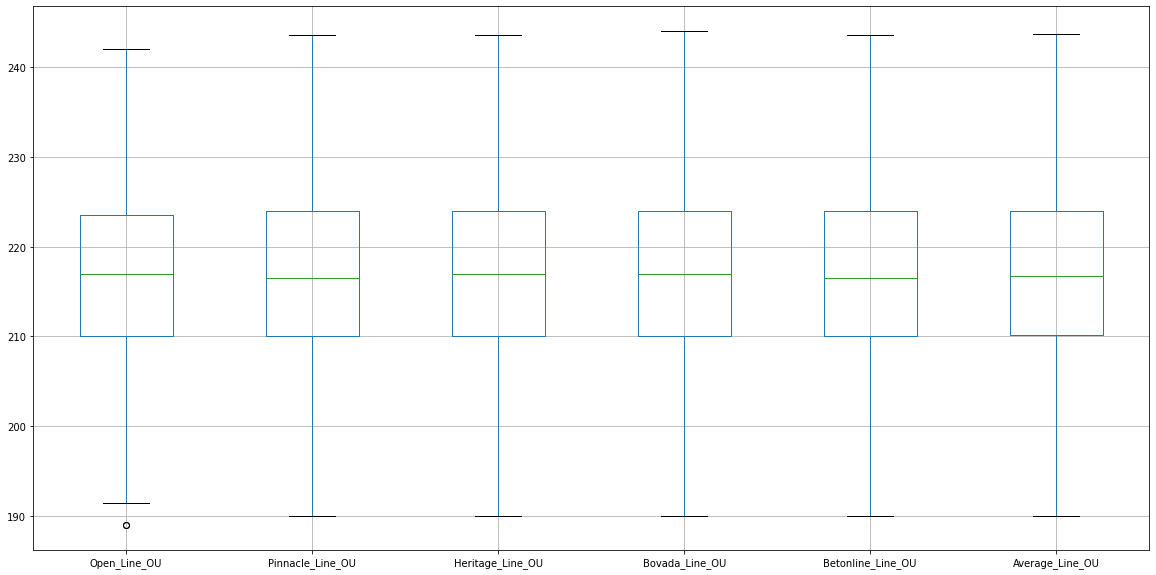

In [224]:
full_odds_df.boxplot(column=["Open_Line_OU", "Pinnacle_Line_OU", "Heritage_Line_OU", "Bovada_Line_OU", "Betonline_Line_OU", "Average_Line_OU"], figsize=(20, 10))

In [225]:
# With Outliers Dealt With, Fill In remaining Null Values (NaN)

In [280]:
def fill_in_nulls(df, column_list, groupings=3):
    book_regex = re.compile(r"Open|Pinnacle|Heritage|Bovada|Betonline")
    # Create a Dictionary of Columns of books to their closest correlate book
    correlate_dictionary = {}
    for columns in column_list:
        correlation_matrix = df.dropna().loc[:, columns].corr()
        for column in correlation_matrix.columns:
            correlate_dictionary[column] = correlation_matrix.loc[:, column].sort_values().index[-2]
    
    for index, row in df.iterrows():
        for columns in column_list:
            for column in columns:
                if np.isnan(row[column]) and ("ML" in column): # checks for np.nan and if Moneyline
                    if np.isnan(row[correlate_dictionary[column]]): # checks for associate correlate np.nan
                        df.loc[index, column] = row[column.replace(book_regex.search(column)[0], "Average")] # reverts to average
                    else:
                        df.loc[index, column] = row[correlate_dictionary[column]] # Correlate was not null, row is filled in
                elif np.isnan(row[column]): # checks for np.nan and if number is spread/total 
                    if np.isnan(row[correlate_dictionary[column]]): # checks for associate correlate np.nan
                        df.loc[index, column] = row[column.replace(book_regex.search(column)[0], "Average")] # reverts to average
                        df.loc[index, column.replace("Line", "Odds")] = row[column.replace(book_regex.search(column)[0], "Average").replace("Line", "Odds")]
                    else:
                        df.loc[index, column] = row[correlate_dictionary[column]] # Correlate was not null, number is filled in
                        df.loc[index, column.replace("Line", "Odds")] = row[correlate_dictionary[column].replace("Line", "Odds")] # Correlate was not null, corresponding Odds are filled in
    
    return df

In [227]:
sample_df = full_odds_df.copy(deep=True)

In [228]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5240 entries, 0 to 5239
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   5240 non-null   object 
 1   Location               5240 non-null   object 
 2   Team                   5240 non-null   object 
 3   OppTeam                5240 non-null   object 
 4   TeamId                 5240 non-null   int64  
 5   GameId                 5240 non-null   int64  
 6   PercentBet_ML          5240 non-null   float64
 7   Open_ML                5098 non-null   float64
 8   Pinnacle_ML            5140 non-null   float64
 9   Heritage_ML            5128 non-null   float64
 10  Bovada_ML              5126 non-null   float64
 11  Betonline_ML           5138 non-null   float64
 12  Average_ML             5240 non-null   float64
 13  Best_ML                5240 non-null   float64
 14  Worst_ML               5240 non-null   float64
 15  Perc

In [232]:
sample_df[sample_df.Average_Line_Spread.isnull()].iloc[:, :]

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_ML,Pinnacle_ML,Heritage_ML,...,Average_Odds_OU,Best_Line_OU,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total,playoffs
5192,2019-05-07,away,Portland,Denver,1610612757,41800235,52.6,160.0,NaN,NaN,...,-105.0,213.5,213.5,-105.0,-105.0,98.0,-26.0,L,222.0,1
5193,2019-05-07,home,Denver,Portland,1610612743,41800235,47.4,-185.0,NaN,NaN,...,-105.0,213.5,213.5,-105.0,-105.0,124.0,26.0,W,222.0,1


In [248]:
sample_df[sample_df.Average_Line_Spread.isnull()].iloc[:, :]

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_ML,Pinnacle_ML,Heritage_ML,...,Average_Odds_OU,Best_Line_OU,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total,playoffs
5192,2019-05-07,away,Portland,Denver,1610612757,41800235,52.6,160.0,NaN,NaN,...,-105.0,213.5,213.5,-105.0,-105.0,98.0,-26.0,L,222.0,1
5193,2019-05-07,home,Denver,Portland,1610612743,41800235,47.4,-185.0,NaN,NaN,...,-105.0,213.5,213.5,-105.0,-105.0,124.0,26.0,W,222.0,1


In [249]:
sample_df[sample_df.Average_Line_OU.isnull()].iloc[:, :]

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_ML,Pinnacle_ML,Heritage_ML,...,Average_Odds_OU,Best_Line_OU,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total,playoffs
2806,2018-10-29,away,Toronto,Milwaukee,1610612761,21800092,50.8,-110.0,-118.0,-130.0,...,NaN,NaN,NaN,NaN,NaN,109.0,-15.0,L,233.0,0
2807,2018-10-29,home,Milwaukee,Toronto,1610612749,21800092,49.2,-110.0,107.0,110.0,...,NaN,NaN,NaN,NaN,NaN,124.0,15.0,W,233.0,0


In [250]:
sample_df[sample_df.Average_Odds_OU.isnull()].iloc[:, :]

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_ML,Pinnacle_ML,Heritage_ML,...,Average_Odds_OU,Best_Line_OU,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total,playoffs
2806,2018-10-29,away,Toronto,Milwaukee,1610612761,21800092,50.8,-110.0,-118.0,-130.0,...,NaN,NaN,NaN,NaN,NaN,109.0,-15.0,L,233.0,0
2807,2018-10-29,home,Milwaukee,Toronto,1610612749,21800092,49.2,-110.0,107.0,110.0,...,NaN,NaN,NaN,NaN,NaN,124.0,15.0,W,233.0,0


In [251]:
sample_df[sample_df.Average_Line_Spread.isnull()].iloc[:, :]

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_ML,Pinnacle_ML,Heritage_ML,...,Average_Odds_OU,Best_Line_OU,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total,playoffs
5192,2019-05-07,away,Portland,Denver,1610612757,41800235,52.6,160.0,NaN,NaN,...,-105.0,213.5,213.5,-105.0,-105.0,98.0,-26.0,L,222.0,1
5193,2019-05-07,home,Denver,Portland,1610612743,41800235,47.4,-185.0,NaN,NaN,...,-105.0,213.5,213.5,-105.0,-105.0,124.0,26.0,W,222.0,1


In [233]:
olde_df = pd.concat([odds_17, odds_17_playoffs, odds_18, odds_18_playoffs], axis=0, ignore_index=True)

In [261]:
sample_df.loc[5192:5193, [x for x in sample_df.columns if "_Spread" in x]]

,PercentBet_Spread,Open_Line_Spread,Open_Odds_Spread,Pinnacle_Line_Spread,Pinnacle_Odds_Spread,Heritage_Line_Spread,Heritage_Odds_Spread,Bovada_Line_Spread,Bovada_Odds_Spread,Betonline_Line_Spread,Betonline_Odds_Spread,Average_Line_Spread,Average_Odds_Spread,Best_Line_Spread,Worst_Line_Spread,Best_Odds_Spread,Worst_Odds_Spread
5192,49.9,4.5,-110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5193,50.1,-4.5,-110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [263]:
sample_df.loc[2806:2807, [x for x in sample_df.columns if "_OU" in x]]

,PercentBet_OU,Open_Line_OU,Open_Odds_OU,Pinnacle_Line_OU,Pinnacle_Odds_OU,Heritage_Line_OU,Heritage_Odds_OU,Bovada_Line_OU,Bovada_Odds_OU,Betonline_Line_OU,Betonline_Odds_OU,Average_Line_OU,Average_Odds_OU,Best_Line_OU,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU
2806,55.4,223.0,-110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2807,44.6,223.0,-110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# To Do: Fill in Average_Line_Spread, Average_Line_Odds, Average_Line_OU, Average_Odds_OU with avaiable Lines from Games So That Average is Always Filled

In [271]:
sample_df.loc[5192, "Average_Line_Spread"] = sample_df.loc[5192, "Open_Line_Spread"] 
sample_df.loc[5192, "Average_Odds_Spread"] = sample_df.loc[5192, "Open_Odds_Spread"]
sample_df.loc[5192, "Best_Line_Spread"] = sample_df.loc[5192, "Open_Line_Spread"] 
sample_df.loc[5192, "Best_Odds_Spread"] = sample_df.loc[5192, "Open_Odds_Spread"]
sample_df.loc[5192, "Worst_Line_Spread"] = sample_df.loc[5192, "Open_Line_Spread"] 
sample_df.loc[5192, "Worst_Odds_Spread"] = sample_df.loc[5192, "Open_Odds_Spread"]

sample_df.loc[5193, "Average_Line_Spread"] = sample_df.loc[5193, "Open_Line_Spread"]
sample_df.loc[5193, "Average_Odds_Spread"] = sample_df.loc[5193, "Open_Line_Spread"]
sample_df.loc[5193, "Best_Line_Spread"] = sample_df.loc[5193, "Open_Line_Spread"] 
sample_df.loc[5193, "Best_Odds_Spread"] = sample_df.loc[5193, "Open_Odds_Spread"]
sample_df.loc[5193, "Worst_Line_Spread"] = sample_df.loc[5193, "Open_Line_Spread"] 
sample_df.loc[5193, "Worst_Odds_Spread"] = sample_df.loc[5193, "Open_Odds_Spread"]

In [274]:
sample_df.loc[2806, "Average_Line_OU"] = sample_df.loc[2806, "Open_Line_OU"]
sample_df.loc[2806, "Average_Odds_OU"] = sample_df.loc[2806, "Open_Line_OU"]
sample_df.loc[2806, "Best_Line_OU"] = sample_df.loc[2806, "Open_Line_OU"]
sample_df.loc[2806, "Best_Odds_OU"] = sample_df.loc[2806, "Open_Line_OU"]
sample_df.loc[2806, "Worst_Line_OU"] = sample_df.loc[2806, "Open_Line_OU"]
sample_df.loc[2806, "Worst_Odds_OU"] = sample_df.loc[2806, "Open_Line_OU"]

sample_df.loc[2807, "Average_Line_OU"] = sample_df.loc[2807, "Open_Line_OU"]
sample_df.loc[2807, "Average_Odds_OU"] = sample_df.loc[2807, "Open_Line_OU"]
sample_df.loc[2807, "Best_Line_OU"] = sample_df.loc[2807, "Open_Line_OU"]
sample_df.loc[2807, "Best_Odds_OU"] = sample_df.loc[2807, "Open_Line_OU"]
sample_df.loc[2807, "Worst_Line_OU"] = sample_df.loc[2807, "Open_Line_OU"]
sample_df.loc[2807, "Worst_Odds_OU"] = sample_df.loc[2807, "Open_Line_OU"]

In [275]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5240 entries, 0 to 5239
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   5240 non-null   object 
 1   Location               5240 non-null   object 
 2   Team                   5240 non-null   object 
 3   OppTeam                5240 non-null   object 
 4   TeamId                 5240 non-null   int64  
 5   GameId                 5240 non-null   int64  
 6   PercentBet_ML          5240 non-null   float64
 7   Open_ML                5098 non-null   float64
 8   Pinnacle_ML            5140 non-null   float64
 9   Heritage_ML            5128 non-null   float64
 10  Bovada_ML              5126 non-null   float64
 11  Betonline_ML           5138 non-null   float64
 12  Average_ML             5240 non-null   float64
 13  Best_ML                5240 non-null   float64
 14  Worst_ML               5240 non-null   float64
 15  Perc

In [278]:
wanted_columns = [['Open_ML', 'Pinnacle_ML','Heritage_ML', 'Bovada_ML', 'Betonline_ML'],
 ['Open_Line_Spread', 'Pinnacle_Line_Spread',
 'Heritage_Line_Spread', 'Bovada_Line_Spread','Betonline_Line_Spread'], 
 ['Open_Line_OU', 'Pinnacle_Line_OU','Heritage_Line_OU', 'Bovada_Line_OU','Betonline_Line_OU']]

In [281]:
new_df = fill_in_nulls(sample_df, wanted_columns)

In [282]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5240 entries, 0 to 5239
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   5240 non-null   object 
 1   Location               5240 non-null   object 
 2   Team                   5240 non-null   object 
 3   OppTeam                5240 non-null   object 
 4   TeamId                 5240 non-null   int64  
 5   GameId                 5240 non-null   int64  
 6   PercentBet_ML          5240 non-null   float64
 7   Open_ML                5240 non-null   float64
 8   Pinnacle_ML            5240 non-null   float64
 9   Heritage_ML            5240 non-null   float64
 10  Bovada_ML              5240 non-null   float64
 11  Betonline_ML           5240 non-null   float64
 12  Average_ML             5240 non-null   float64
 13  Best_ML                5240 non-null   float64
 14  Worst_ML               5240 non-null   float64
 15  Perc

In [284]:
full_odds_df[full_odds_df.Open_ML.isnull()].loc[:, ['Open_ML', 'Pinnacle_ML', 'Heritage_ML', 'Bovada_ML', 'Betonline_ML',
 'Open_Line_Spread', 'Pinnacle_Line_Spread', 'Heritage_Line_Spread', 'Bovada_Line_Spread','Betonline_Line_Spread']]

,Open_ML,Pinnacle_ML,Heritage_ML,Bovada_ML,Betonline_ML,Open_Line_Spread,Pinnacle_Line_Spread,Heritage_Line_Spread,Bovada_Line_Spread,Betonline_Line_Spread
1922,NaN,1089.0,1185.0,1000.0,NaN,14.5,14.5,15.0,15.5,15.0
1923,NaN,-1575.0,-1835.0,-2200.0,NaN,-14.5,-14.5,-15.0,-15.5,-15.0
2304,NaN,1110.0,1185.0,1000.0,NaN,15.5,14.5,15.0,15.0,15.0
2305,NaN,-1616.0,-1835.0,-2200.0,NaN,-15.5,-14.5,-15.0,-15.0,-15.0
2306,NaN,1102.0,1090.0,1300.0,NaN,13.5,15.0,15.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...
5045,NaN,377.0,375.0,350.0,390.0,10.0,9.5,9.5,10.0,9.5
5198,NaN,-123.0,-120.0,-130.0,-121.0,NaN,-1.5,-1.5,-2.0,-1.5
5199,NaN,111.0,100.0,110.0,101.0,NaN,1.5,1.5,2.0,1.5
5200,NaN,158.0,160.0,150.0,155.0,NaN,4.0,4.0,4.0,4.0


In [285]:
new_df[full_odds_df.Open_ML.isnull()].loc[:, ['Open_ML', 'Pinnacle_ML', 'Heritage_ML', 'Bovada_ML', 'Betonline_ML',
 'Open_Line_Spread', 'Pinnacle_Line_Spread',
 'Heritage_Line_Spread', 'Bovada_Line_Spread','Betonline_Line_Spread']]

,Open_ML,Pinnacle_ML,Heritage_ML,Bovada_ML,Betonline_ML,Open_Line_Spread,Pinnacle_Line_Spread,Heritage_Line_Spread,Bovada_Line_Spread,Betonline_Line_Spread
1922,1000.0,1089.0,1185.0,1000.0,1089.0,14.5,14.5,15.0,15.5,15.0
1923,-2200.0,-1575.0,-1835.0,-2200.0,-1575.0,-14.5,-14.5,-15.0,-15.5,-15.0
2304,1000.0,1110.0,1185.0,1000.0,1110.0,15.5,14.5,15.0,15.0,15.0
2305,-2200.0,-1616.0,-1835.0,-2200.0,-1616.0,-15.5,-14.5,-15.0,-15.0,-15.0
2306,1300.0,1102.0,1090.0,1300.0,1102.0,13.5,15.0,15.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...
5045,350.0,377.0,375.0,350.0,390.0,10.0,9.5,9.5,10.0,9.5
5198,-130.0,-123.0,-120.0,-130.0,-121.0,-2.0,-1.5,-1.5,-2.0,-1.5
5199,110.0,111.0,100.0,110.0,101.0,2.0,1.5,1.5,2.0,1.5
5200,150.0,158.0,160.0,150.0,155.0,4.0,4.0,4.0,4.0,4.0


# Remaining Objectives:
 ## Combine Bookmaker Data with Results Data (df_full_stats) 
   #### Do this by constructing the high level information in the full odds dataframe to reverse engineer into the original game_codes we have today
   #### This can be done by joining on team and date as well once the team abbreviations are translated to those on bball reference. Which should be easier and quicker. 
 ## Once we have this we will end up with complete Sportline information for all games of the the past two full seasons (17-18) and (18-19)
   #### I did this first so we could have additional information about the gambling markets to compare to the model we will create (i.e.: A baseline to compare our error to the true market error for each game)
   #### So once I get this data to a game by game configuration, I will able to match it with our current game information and start the model building process.  

In [290]:
df_full_stats.head()

,team,minutes_played,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,...,usg_pct,off_rtg,def_rtg,pf,pts,home_team,home_team_bin,game_code,date,NBA_season
0,DAL,240.0,38.0,92.0,0.413,12.0,30.0,0.400,19.0,24.0,...,100.0,106.2,115.2,17.0,107.0,TOR,False,201810260TOR,2018-10-26,18-19
1,TOR,240.0,44.0,91.0,0.484,11.0,27.0,0.407,17.0,20.0,...,100.0,115.2,106.2,22.0,116.0,TOR,True,201810260TOR,2018-10-26,18-19
2,BOS,240.0,40.0,99.0,0.404,14.0,36.0,0.389,7.0,10.0,...,100.0,103.3,115.6,27.0,101.0,TOR,False,201810190TOR,2018-10-19,18-19
3,TOR,240.0,43.0,92.0,0.467,13.0,35.0,0.371,14.0,19.0,...,100.0,115.6,103.3,19.0,113.0,TOR,True,201810190TOR,2018-10-19,18-19
4,CLE,240.0,34.0,85.0,0.400,7.0,19.0,0.368,29.0,39.0,...,100.0,103.7,115.6,25.0,104.0,TOR,False,201810170TOR,2018-10-17,18-19


In [291]:
new_df.head()

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_ML,Pinnacle_ML,Heritage_ML,...,Average_Odds_OU,Best_Line_OU,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total,playoffs
0,2017-10-17,away,Boston,Cleveland,1610612738,21700001,50.4,150.0,166.0,165.0,...,-106.50,216.5,216.0,-101.0,-110.0,99.0,-3.0,L,201.0,0
1,2017-10-17,home,Cleveland,Boston,1610612739,21700001,49.6,-170.0,-185.0,-190.0,...,-108.50,216.5,216.0,-105.0,-110.0,102.0,3.0,W,201.0,0
2,2017-10-17,away,Houston,Golden State,1610612745,21700002,52.7,405.0,377.0,390.0,...,-111.25,232.5,230.5,-105.0,-115.0,122.0,1.0,W,243.0,0
3,2017-10-17,home,Golden State,Houston,1610612744,21700002,47.3,-500.0,-440.0,-515.0,...,-103.75,232.5,230.5,-100.0,-105.0,121.0,-1.0,L,243.0,0
4,2017-10-18,away,Charlotte,Detroit,1610612766,21700003,51.3,130.0,127.0,125.0,...,-108.75,202.0,202.0,-105.0,-115.0,90.0,-12.0,L,192.0,0


In [465]:
new_df_w_codes.shape

(5240, 57)

In [466]:
new_df_w_codes.team_abbv.value_counts()

GSW    207
TOR    198
HOU    192
BOS    192
MIL    186
PHI    186
CLE    186
POR    184
UTA    180
DEN    178
SAS    175
IND    175
OKC    172
NOP    172
MIA    169
MIN    169
WAS    169
BRK    169
LAC    169
ORL    169
DET    168
LAL    164
PHO    164
CHI    164
SAC    164
ATL    164
NYK    164
CHO    164
DAL    164
MEM    163
Name: team_abbv, dtype: int64

In [467]:
df_full_stats.team.value_counts()

GSW    207
TOR    198
HOU    192
BOS    192
CLE    186
MIL    186
PHI    186
POR    184
UTA    180
DEN    178
SAS    176
OKC    175
IND    175
NOP    173
WAS    170
LAC    170
MIA    169
MIN    169
BRK    169
ORL    169
DET    168
LAL    164
PHO    164
CHI    164
SAC    164
ATL    164
NYK    164
MEM    164
CHO    164
DAL    164
Name: team, dtype: int64

In [471]:
df_full_stats.groupby("team").count()

,minutes_played,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,...,usg_pct,off_rtg,def_rtg,pf,pts,home_team,home_team_bin,game_code,date,NBA_season
team,,,,,,,,,,,,,,,,,,,,,
ATL,164,164,164,164,164,164,164,164,164,164,...,164,164,164,164,164,164,164,164,164,164
BOS,192,192,192,192,192,192,192,192,192,192,...,192,192,192,192,192,192,192,192,192,192
BRK,169,169,169,169,169,169,169,169,169,169,...,169,169,169,169,169,169,169,169,169,169
CHI,164,164,164,164,164,164,164,164,164,164,...,164,164,164,164,164,164,164,164,164,164
CHO,164,164,164,164,164,164,164,164,164,164,...,164,164,164,164,164,164,164,164,164,164
CLE,186,186,186,186,186,186,186,186,186,186,...,186,186,186,186,186,186,186,186,186,186
DAL,164,164,164,164,164,164,164,164,164,164,...,164,164,164,164,164,164,164,164,164,164
DEN,178,178,178,178,178,178,178,178,178,178,...,178,178,178,178,178,178,178,178,178,178
DET,168,168,168,168,168,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168


In [472]:
new_df_w_codes.groupby("team_abbv").count()

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_ML,Pinnacle_ML,Heritage_ML,...,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total,playoffs,opp_abbv,game_code
team_abbv,,,,,,,,,,,,,,,,,,,,,
ATL,164,164,164,164,164,164,164,164,164,164,...,164,164,164,164,164,164,164,164,164,164
BOS,192,192,192,192,192,192,192,192,192,192,...,192,192,192,192,192,192,192,192,192,192
BRK,169,169,169,169,169,169,169,169,169,169,...,169,169,169,169,169,169,169,169,169,169
CHI,164,164,164,164,164,164,164,164,164,164,...,164,164,164,164,164,164,164,164,164,164
CHO,164,164,164,164,164,164,164,164,164,164,...,164,164,164,164,164,164,164,164,164,164
CLE,186,186,186,186,186,186,186,186,186,186,...,186,186,186,186,186,186,186,186,186,186
DAL,164,164,164,164,164,164,164,164,164,164,...,164,164,164,164,164,164,164,164,164,164
DEN,178,178,178,178,178,178,178,178,178,178,...,178,178,178,178,178,178,178,178,178,178
DET,168,168,168,168,168,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168


In [476]:
new_df_w_codes[(new_df_w_codes.Date.str.find("/") > 0)]

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_ML,Pinnacle_ML,Heritage_ML,...,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total,playoffs,team_abbv,opp_abbv,game_code
2460,4/14/2018,away,Washington,Toronto,1610612764,41700101,55.8,315.0,324.0,305.0,...,-105.0,-115.0,106.0,-8.0,L,220.0,1,WAS,TOR,41420180TOR
2461,4/14/2018,home,Toronto,Washington,1610612761,41700101,44.2,-375.0,-373.0,-385.0,...,-105.0,-110.0,114.0,8.0,W,220.0,1,TOR,WAS,41420180TOR
2462,4/14/2018,away,Miami,Philadelphia,1610612748,41700121,50.3,230.0,208.0,195.0,...,-102.0,-110.0,103.0,-27.0,L,233.0,1,MIA,PHI,41420180PHI
2463,4/14/2018,home,Philadelphia,Miami,1610612755,41700121,49.7,-275.0,-233.0,-230.0,...,-105.0,-115.0,130.0,27.0,W,233.0,1,PHI,MIA,41420180PHI
2464,4/14/2018,away,San Antonio,Golden State,1610612759,41700151,49.8,300.0,330.0,330.0,...,-105.0,-110.0,92.0,-21.0,L,205.0,1,SAS,GSW,41420180GSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,6/3/2018,home,Golden State,Cleveland,1610612744,41700402,28.5,-750.0,-527.0,-520.0,...,-105.0,-114.0,122.0,19.0,W,225.0,1,GSW,CLE,6320180GSW
2620,6/6/2018,away,Golden State,Cleveland,1610612744,41700403,32.0,-195.0,-147.0,-140.0,...,-105.0,-115.0,110.0,8.0,W,212.0,1,GSW,CLE,6620180CLE
2621,6/6/2018,home,Cleveland,Golden State,1610612739,41700403,68.0,170.0,133.0,120.0,...,-102.0,-105.0,102.0,-8.0,L,212.0,1,CLE,GSW,6620180CLE
2622,6/8/2018,away,Golden State,Cleveland,1610612744,41700404,41.5,-210.0,-166.0,-170.0,...,-105.0,-115.0,108.0,23.0,W,193.0,1,GSW,CLE,6820180CLE


In [477]:
new_df_w_codes.game_code.sort_values()

0       201710170CLE
1       201710170CLE
2       201710170GSW
3       201710170GSW
12      201710180BOS
            ...     
2618      6320180GSW
2620      6620180CLE
2621      6620180CLE
2623      6820180CLE
2622      6820180CLE
Name: game_code, Length: 5240, dtype: object

In [478]:
new_df_w_codes[new_df_w_codes.Date.str.find("/") > 0]

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_ML,Pinnacle_ML,Heritage_ML,...,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total,playoffs,team_abbv,opp_abbv,game_code
2460,4/14/2018,away,Washington,Toronto,1610612764,41700101,55.8,315.0,324.0,305.0,...,-105.0,-115.0,106.0,-8.0,L,220.0,1,WAS,TOR,41420180TOR
2461,4/14/2018,home,Toronto,Washington,1610612761,41700101,44.2,-375.0,-373.0,-385.0,...,-105.0,-110.0,114.0,8.0,W,220.0,1,TOR,WAS,41420180TOR
2462,4/14/2018,away,Miami,Philadelphia,1610612748,41700121,50.3,230.0,208.0,195.0,...,-102.0,-110.0,103.0,-27.0,L,233.0,1,MIA,PHI,41420180PHI
2463,4/14/2018,home,Philadelphia,Miami,1610612755,41700121,49.7,-275.0,-233.0,-230.0,...,-105.0,-115.0,130.0,27.0,W,233.0,1,PHI,MIA,41420180PHI
2464,4/14/2018,away,San Antonio,Golden State,1610612759,41700151,49.8,300.0,330.0,330.0,...,-105.0,-110.0,92.0,-21.0,L,205.0,1,SAS,GSW,41420180GSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,6/3/2018,home,Golden State,Cleveland,1610612744,41700402,28.5,-750.0,-527.0,-520.0,...,-105.0,-114.0,122.0,19.0,W,225.0,1,GSW,CLE,6320180GSW
2620,6/6/2018,away,Golden State,Cleveland,1610612744,41700403,32.0,-195.0,-147.0,-140.0,...,-105.0,-115.0,110.0,8.0,W,212.0,1,GSW,CLE,6620180CLE
2621,6/6/2018,home,Cleveland,Golden State,1610612739,41700403,68.0,170.0,133.0,120.0,...,-102.0,-105.0,102.0,-8.0,L,212.0,1,CLE,GSW,6620180CLE
2622,6/8/2018,away,Golden State,Cleveland,1610612744,41700404,41.5,-210.0,-166.0,-170.0,...,-105.0,-115.0,108.0,23.0,W,193.0,1,GSW,CLE,6820180CLE


In [384]:
new_df_w_codes.columns

Index(['Date', 'Location', 'Team', 'OppTeam', 'TeamId', 'GameId',
       'PercentBet_ML', 'Open_ML', 'Pinnacle_ML', 'Heritage_ML', 'Bovada_ML',
       'Betonline_ML', 'Average_ML', 'Best_ML', 'Worst_ML',
       'PercentBet_Spread', 'Open_Line_Spread', 'Open_Odds_Spread',
       'Pinnacle_Line_Spread', 'Pinnacle_Odds_Spread', 'Heritage_Line_Spread',
       'Heritage_Odds_Spread', 'Bovada_Line_Spread', 'Bovada_Odds_Spread',
       'Betonline_Line_Spread', 'Betonline_Odds_Spread', 'Average_Line_Spread',
       'Average_Odds_Spread', 'Best_Line_Spread', 'Worst_Line_Spread',
       'Best_Odds_Spread', 'Worst_Odds_Spread', 'PercentBet_OU',
       'Open_Line_OU', 'Open_Odds_OU', 'Pinnacle_Line_OU', 'Pinnacle_Odds_OU',
       'Heritage_Line_OU', 'Heritage_Odds_OU', 'Bovada_Line_OU',
       'Bovada_Odds_OU', 'Betonline_Line_OU', 'Betonline_Odds_OU',
       'Average_Line_OU', 'Average_Odds_OU', 'Best_Line_OU', 'Worst_Line_OU',
       'Best_Odds_OU', 'Worst_Odds_OU', 'Pts', 'Spread', 'Result', 'T

In [385]:
new_df_w_codes.groupby("playoffs").count()

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_ML,Pinnacle_ML,Heritage_ML,...,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total,team_abbv,opp_abbv,game_code
playoffs,,,,,,,,,,,,,,,,,,,,,
0,4912,4912,4912,4912,4912,4912,4912,4912,4912,4912,...,4912,4912,4912,4912,4912,4912,4912,4912,4912,4912
1,328,328,328,328,328,328,328,328,328,328,...,328,328,328,328,328,328,328,328,328,328


In [371]:
df_full_stats.merge(new_df_w_codes, how="left",right_on=["team_abbv", "game_code"], left_on=["team", "game_code"])[lambda x: x.PercentBet_ML.isnull()].groupby("playoffs").count()

,team,minutes_played,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,...,Best_Line_OU,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total,team_abbv,opp_abbv
playoffs,,,,,,,,,,,,,,,,,,,,,


In [440]:
new_df_w_codes[(new_df_w_codes.Team == "Oklahoma City") & (new_df_w_codes.opp_abbv == "SAS")]

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_ML,Pinnacle_ML,Heritage_ML,...,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total,playoffs,team_abbv,opp_abbv,game_code
444,2017-11-17,away,Oklahoma City,San Antonio,1610612760,21700223,41.3,-125.0,-123.0,-125.0,...,-105.0,-115.0,101.0,-3.0,L,205.0,0,OKC,SAS,201711170SAS
673,2017-12-03,home,Oklahoma City,San Antonio,1610612760,21700337,45.5,-175.0,-359.0,-410.0,...,-100.0,-110.0,90.0,3.0,W,177.0,0,OKC,SAS,201712030OKC
1977,2018-03-10,home,Oklahoma City,San Antonio,1610612760,21700990,55.0,-190.0,-173.0,-180.0,...,-105.0,-115.0,104.0,10.0,W,198.0,0,OKC,SAS,201803100OKC
2250,2018-03-29,away,Oklahoma City,San Antonio,1610612760,21701126,48.3,-130.0,107.0,100.0,...,-105.0,-112.0,99.0,-4.0,L,202.0,0,OKC,SAS,201803290SAS
3856,2019-01-10,away,Oklahoma City,San Antonio,1610612760,21800619,44.5,-115.0,-120.0,-115.0,...,-104.0,-109.0,147.0,-7.0,L,301.0,0,OKC,SAS,201901100SAS
4494,2019-03-02,away,Oklahoma City,San Antonio,1610612760,21800940,60.1,144.0,171.0,175.0,...,-105.0,-115.0,102.0,-14.0,L,218.0,0,OKC,SAS,201903020SAS


In [452]:
data_codes.difference(gambling_codes)

{'201804140GSW',
 '201804140PHI',
 '201804140POR',
 '201804140TOR',
 '201804150BOS',
 '201804150CLE',
 '201804150HOU',
 '201804150OKC',
 '201804160GSW',
 '201804160PHI',
 '201804170BOS',
 '201804170POR',
 '201804170TOR',
 '201804180CLE',
 '201804180HOU',
 '201804180OKC',
 '201804190MIA',
 '201804190NOP',
 '201804190SAS',
 '201804200IND',
 '201804200MIL',
 '201804200WAS',
 '201804210MIA',
 '201804210MIN',
 '201804210NOP',
 '201804210UTA',
 '201804220IND',
 '201804220MIL',
 '201804220SAS',
 '201804220WAS',
 '201804230MIN',
 '201804230UTA',
 '201804240BOS',
 '201804240GSW',
 '201804240PHI',
 '201804250CLE',
 '201804250HOU',
 '201804250OKC',
 '201804250TOR',
 '201804260MIL',
 '201804270IND',
 '201804270UTA',
 '201804270WAS',
 '201804280BOS',
 '201804280GSW',
 '201804290CLE',
 '201804290HOU',
 '201804300BOS',
 '201805010GSW',
 '201805010TOR',
 '201805020HOU',
 '201805030BOS',
 '201805030TOR',
 '201805040NOP',
 '201805040UTA',
 '201805050CLE',
 '201805050PHI',
 '201805060NOP',
 '201805060UTA

In [461]:
"2018/03/12".find("/")

4

In [462]:
new_df_w_codes[(new_df_w_codes.Date.str.find("/") >= 0)]

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_ML,Pinnacle_ML,Heritage_ML,...,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total,playoffs,team_abbv,opp_abbv,game_code
2460,4/14/2018,away,Washington,Toronto,1610612764,41700101,55.8,315.0,324.0,305.0,...,-105.0,-115.0,106.0,-8.0,L,220.0,1,WAS,TOR,4/14/20180TOR
2461,4/14/2018,home,Toronto,Washington,1610612761,41700101,44.2,-375.0,-373.0,-385.0,...,-105.0,-110.0,114.0,8.0,W,220.0,1,TOR,WAS,4/14/20180TOR
2462,4/14/2018,away,Miami,Philadelphia,1610612748,41700121,50.3,230.0,208.0,195.0,...,-102.0,-110.0,103.0,-27.0,L,233.0,1,MIA,PHI,4/14/20180PHI
2463,4/14/2018,home,Philadelphia,Miami,1610612755,41700121,49.7,-275.0,-233.0,-230.0,...,-105.0,-115.0,130.0,27.0,W,233.0,1,PHI,MIA,4/14/20180PHI
2464,4/14/2018,away,San Antonio,Golden State,1610612759,41700151,49.8,300.0,330.0,330.0,...,-105.0,-110.0,92.0,-21.0,L,205.0,1,SAS,GSW,4/14/20180GSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,6/3/2018,home,Golden State,Cleveland,1610612744,41700402,28.5,-750.0,-527.0,-520.0,...,-105.0,-114.0,122.0,19.0,W,225.0,1,GSW,CLE,6/3/20180GSW
2620,6/6/2018,away,Golden State,Cleveland,1610612744,41700403,32.0,-195.0,-147.0,-140.0,...,-105.0,-115.0,110.0,8.0,W,212.0,1,GSW,CLE,6/6/20180CLE
2621,6/6/2018,home,Cleveland,Golden State,1610612739,41700403,68.0,170.0,133.0,120.0,...,-102.0,-105.0,102.0,-8.0,L,212.0,1,CLE,GSW,6/6/20180CLE
2622,6/8/2018,away,Golden State,Cleveland,1610612744,41700404,41.5,-210.0,-166.0,-170.0,...,-105.0,-115.0,108.0,23.0,W,193.0,1,GSW,CLE,6/8/20180CLE


In [507]:
gambling_codes = set(new_df_with_codes.game_code.values)

In [508]:
data_codes = set(df_full_stats.game_code.values)

In [509]:
data_codes.difference(gambling_codes)

{'201811200WAS', '201812120NOP', '201901120OKC', '201902070OKC'}

In [511]:
df_full_stats[df_full_stats.game_code.isin(data_codes.difference(gambling_codes))]

,team,minutes_played,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,...,usg_pct,off_rtg,def_rtg,pf,pts,home_team,home_team_bin,game_code,date,NBA_season
668,SAS,240.0,44.0,96.0,0.458,10.0,31.0,0.323,14.0,20.0,...,100.0,107.8,117.4,18.0,112.0,OKC,False,201901120OKC,2019-01-12,18-19
669,OKC,240.0,43.0,93.0,0.462,11.0,23.0,0.478,25.0,29.0,...,100.0,117.4,107.8,16.0,122.0,OKC,True,201901120OKC,2019-01-12,18-19
676,MEM,240.0,34.0,77.0,0.442,7.0,24.0,0.292,20.0,23.0,...,100.0,95.2,117.3,21.0,95.0,OKC,False,201902070OKC,2019-02-07,18-19
677,OKC,240.0,43.0,90.0,0.478,17.0,44.0,0.386,14.0,22.0,...,100.0,117.3,95.2,25.0,117.0,OKC,True,201902070OKC,2019-02-07,18-19
1528,LAC,240.0,46.0,89.0,0.517,11.0,27.0,0.407,15.0,18.0,...,100.0,113.6,120.3,28.0,118.0,WAS,False,201811200WAS,2018-11-20,18-19
1529,WAS,240.0,40.0,93.0,0.430,13.0,39.0,0.333,32.0,39.0,...,100.0,120.3,113.6,20.0,125.0,WAS,True,201811200WAS,2018-11-20,18-19
2276,OKC,240.0,42.0,87.0,0.483,13.0,43.0,0.302,17.0,27.0,...,100.0,107.2,111.0,27.0,114.0,NOP,False,201812120NOP,2018-12-12,18-19
2277,NOP,240.0,45.0,97.0,0.464,4.0,18.0,0.222,24.0,30.0,...,100.0,111.0,107.2,27.0,118.0,NOP,True,201812120NOP,2018-12-12,18-19


In [44]:
home_odds = full_odds_df[lambda x: x.Location == "home"]
away_odds = full_odds_df[~(full_odds_df.Location == "home")]

In [47]:
odds_final = pd.merge(home_odds, away_odds, on=["game_code"], suffixes=("_home", "_away"))

In [49]:
odds_final.to_csv(index=False, path_or_buf="../data/interim/vegas_game_by_game_odds.csv")